In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
data = np.load('./newdata/50_2020.npy')
open_prices = data[:, 0]
close_prices = data[:, 1]
high_prices = data[:, 2]
low_prices = data[:, 3]
volume = data[:, 4]
trend = data[:, 5]

In [10]:
# 1. 统计分析 - 计算均值、中位数、标准差
open_mean = np.mean(open_prices)
close_mean = np.mean(close_prices)
high_mean = np.mean(high_prices)
low_mean = np.mean(low_prices)
volume_mean = np.mean(volume)

open_median = np.median(open_prices)
close_median = np.median(close_prices)
high_median = np.median(high_prices)
low_median = np.median(low_prices)
volume_median = np.median(volume)

open_std = np.std(open_prices)
close_std = np.std(close_prices)
high_std = np.std(high_prices)
low_std = np.std(low_prices)
volume_std = np.std(volume)

In [11]:
# 统计结果整理成 DataFrame
detailed_statistics = {
    "Metric": ["开盘价", "收盘价", "最高价", "最低价", "成交量"],
    "均值": [open_mean, close_mean, high_mean, low_mean, volume_mean],
    "中位数": [open_median, close_median, high_median, low_median, volume_median],
    "标准差": [open_std, close_std, high_std, low_std, volume_std],
}

# 转换为 DataFrame 并打印
detailed_statistics_df = pd.DataFrame(detailed_statistics)
print(detailed_statistics_df)

  Metric             均值           中位数            标准差
0    开盘价    3117.023886    3176.72415     270.313911
1    收盘价    3117.061292    3176.52865     270.316239
2    最高价    3117.886970    3177.77205     270.417128
3    最低价    3116.194405    3175.41000     270.208865
4    成交量  154207.220925  116577.50000  144871.125411


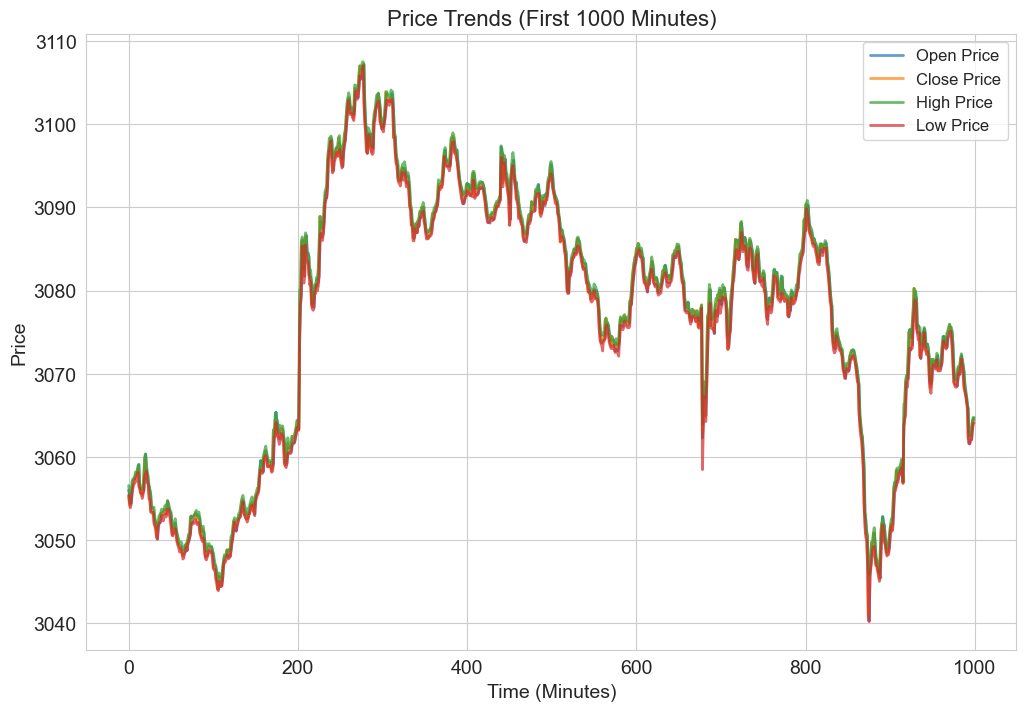

In [12]:
plt.rcParams.update({'font.size': 14})

# 2.1 折线图 - 显示开盘价、收盘价、最高价、最低价的趋势，前1000分钟
plt.figure(figsize=(12, 8))
plt.plot(open_prices[:1000], label='Open Price', linewidth=2, alpha=0.7)
plt.plot(close_prices[:1000], label='Close Price', linewidth=2, alpha=0.7)
plt.plot(high_prices[:1000], label='High Price', linewidth=2, alpha=0.7)
plt.plot(low_prices[:1000], label='Low Price', linewidth=2, alpha=0.7)
plt.title('Price Trends (First 1000 Minutes)', fontsize=16)
plt.xlabel('Time (Minutes)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

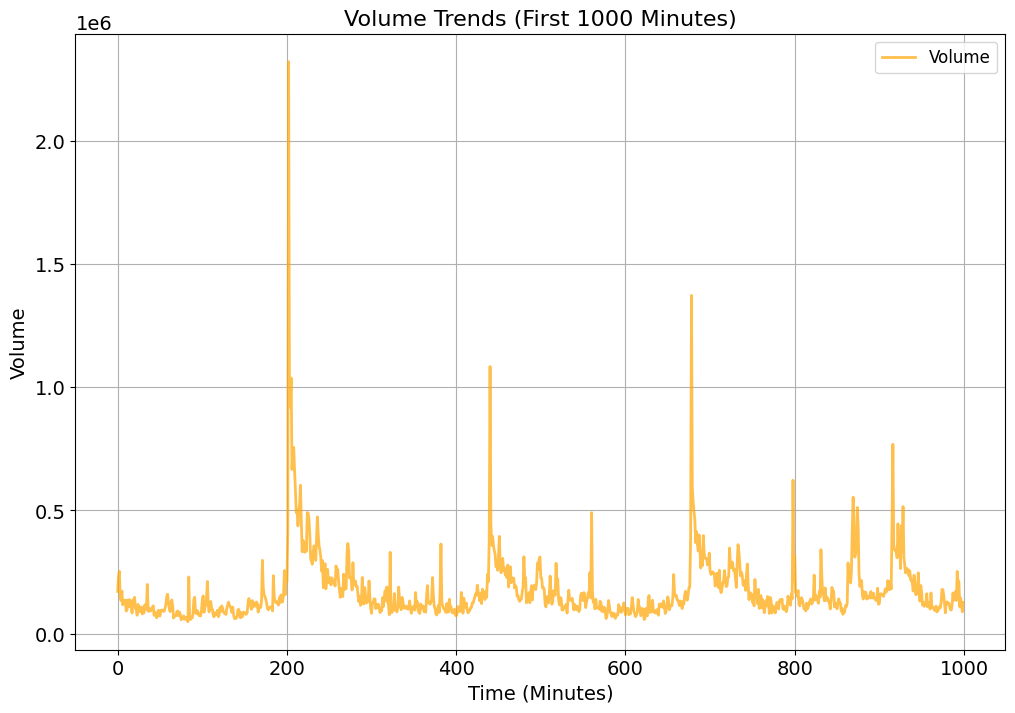

In [39]:
plt.figure(figsize=(12, 8))
plt.plot(volume[:1000], label='Volume', color='orange', linewidth=2, alpha=0.7)
plt.title('Volume Trends (First 1000 Minutes)', fontsize=16)
plt.xlabel('Time (Minutes)', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

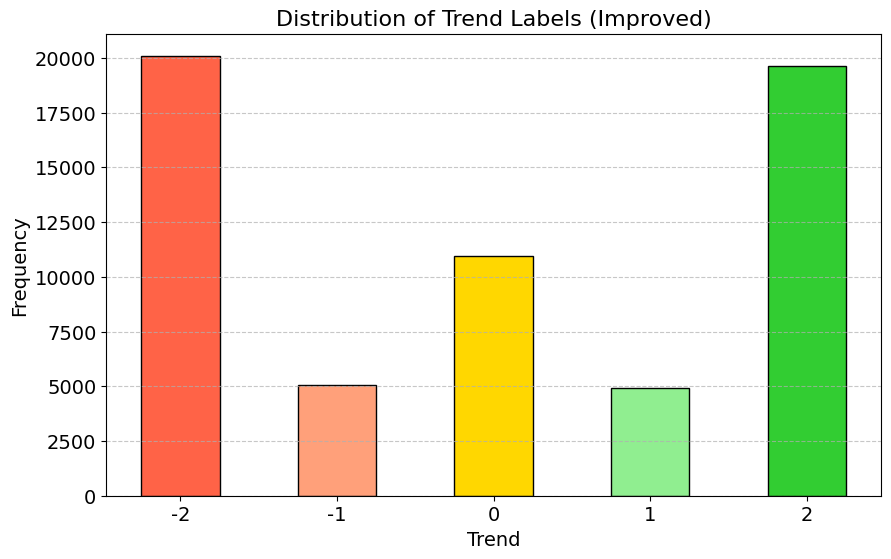

In [45]:
import matplotlib.pyplot as plt

# 2.3 涨跌趋势分布柱状图（美化版）
labels = ['-2', '-1', '0', '1', '2']
trend_counts = [np.sum(trend == -2), np.sum(trend == -1), np.sum(trend == 0), np.sum(trend == 1), np.sum(trend == 2)]

# 绘制美化后的柱状图，并调整颜色和柱宽
plt.figure(figsize=(10, 6))
plt.bar([-2, -1, 0, 1, 2], trend_counts, tick_label=labels, edgecolor='black', 
        color=['#FF6347', '#FFA07A', '#FFD700', '#90EE90', '#32CD32'], width=0.5)
plt.title('Distribution of Trend Labels (Improved)', fontsize=16)
plt.xlabel('Trend', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

                  Metric     Mean  Median      Max      Min
0  Open-Close Difference -0.03812 -0.0234  15.3499 -45.4051
1    High-Low Difference  1.73537  1.3351  45.5865   0.0000


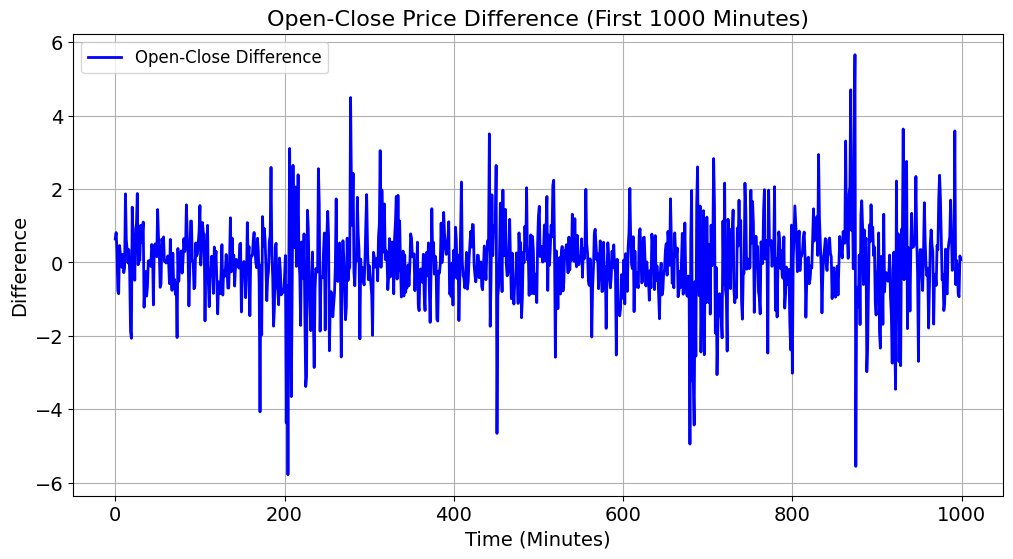

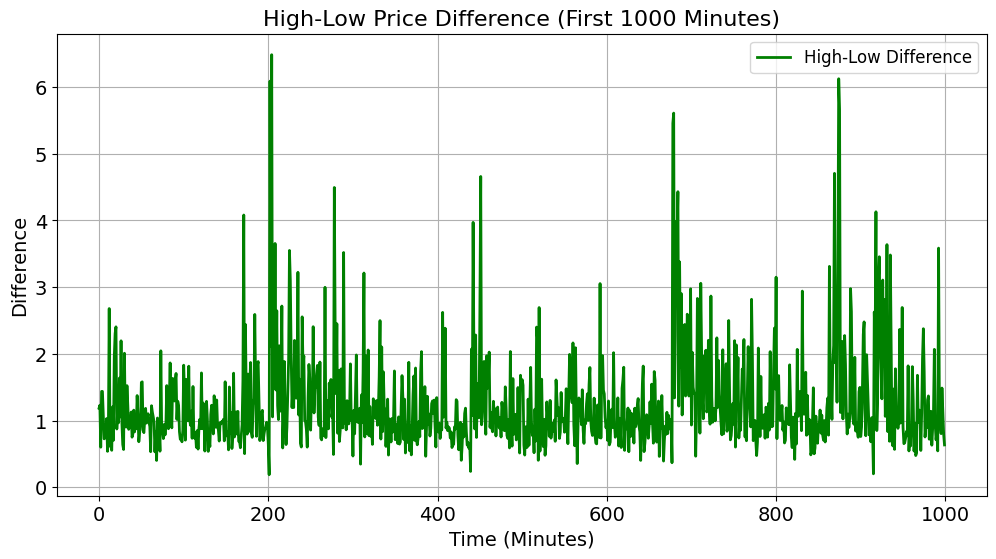

In [43]:
# 1. 差值计算
open_close_diff = open_prices - close_prices  # 开盘价与收盘价的差值
high_low_diff = high_prices - low_prices      # 最高价与最低价的差值

# 2. 差值的统计分析
open_close_mean = np.mean(open_close_diff)
high_low_mean = np.mean(high_low_diff)
open_close_median = np.median(open_close_diff)
high_low_median = np.median(high_low_diff)
open_close_max = np.max(open_close_diff)
high_low_max = np.max(high_low_diff)
open_close_min = np.min(open_close_diff)
high_low_min = np.min(high_low_diff)

# 差值统计结果整理成DataFrame
diff_statistics = {
    "Metric": ["Open-Close Difference", "High-Low Difference"],
    "Mean": [open_close_mean, high_low_mean],
    "Median": [open_close_median, high_low_median],
    "Max": [open_close_max, high_low_max],
    "Min": [open_close_min, high_low_min]
}

diff_statistics_df = pd.DataFrame(diff_statistics)

# 打印差值统计分析结果
print(diff_statistics_df)

# 3. 可视化差值的变化趋势

# 设置字体大小
plt.rcParams.update({'font.size': 14})

# 3.1 开盘价和收盘价差值的变化趋势
plt.figure(figsize=(12, 6))
plt.plot(open_close_diff[:1000], label='Open-Close Difference', color='blue', linewidth=2)
plt.title('Open-Close Price Difference (First 1000 Minutes)', fontsize=16)
plt.xlabel('Time (Minutes)', fontsize=14)
plt.ylabel('Difference', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# 3.2 最高价和最低价差值的变化趋势
plt.figure(figsize=(12, 6))
plt.plot(high_low_diff[:1000], label='High-Low Difference', color='green', linewidth=2)
plt.title('High-Low Price Difference (First 1000 Minutes)', fontsize=16)
plt.xlabel('Time (Minutes)', fontsize=14)
plt.ylabel('Difference', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. 加载数据并提取相关属性
data = np.load('50_2020.npy')

# 提取各个维度的数据
open_prices = data[:, 0]
close_prices = data[:, 1]
high_prices = data[:, 2]
low_prices = data[:, 3]
volume = data[:, 4]
fopen_prices = data[:, 5]
fclose_prices = data[:, 6]
fhigh_prices = data[:, 7]
flow_prices = data[:, 8]
fvolume = data[:, 9]
trend = data[:, 10]  # 趋势标签

# 2. 统计分析
# 计算均值、中位数、标准差
statistics = {
    'Metric': ['开盘价', '收盘价', '最高价', '最低价', '交易量'],
    'Mean': [np.mean(open_prices), np.mean(close_prices), np.mean(high_prices), np.mean(low_prices), np.mean(volume)],
    'Median': [np.median(open_prices), np.median(close_prices), np.median(high_prices), np.median(low_prices), np.median(volume)],
    'Std': [np.std(open_prices), np.std(close_prices), np.std(high_prices), np.std(low_prices), np.std(volume)]
}

statistics_df = pd.DataFrame(statistics)
print(statistics_df)

  Metric           Mean        Median            Std
0    开盘价    3142.830234    3228.83640     295.690114
1    收盘价    3142.868354    3228.78840     295.693347
2    最高价    3143.714268    3230.07535     295.828344
3    最低价    3141.978899    3227.54325     295.547515
4    交易量  155901.876998  118035.00000  145468.154234


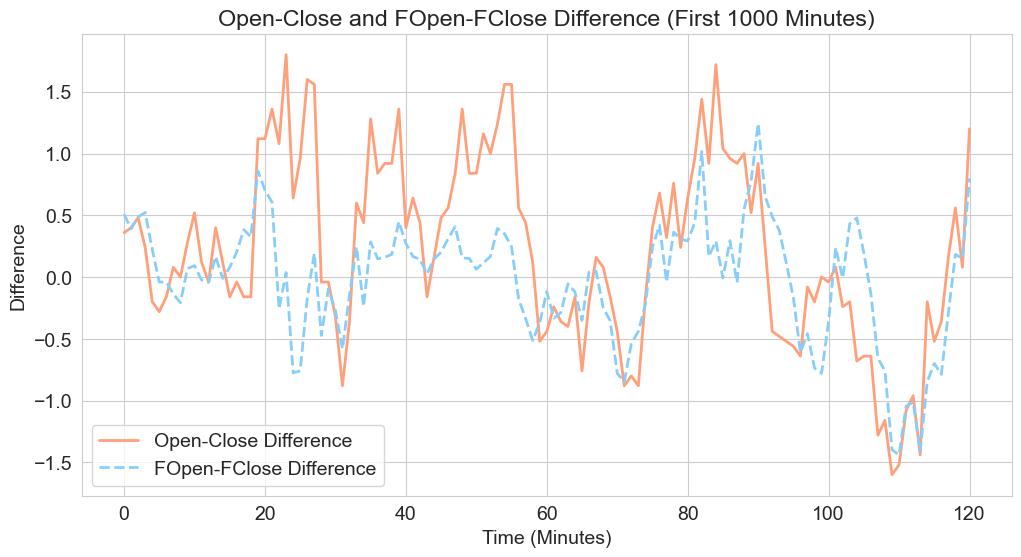

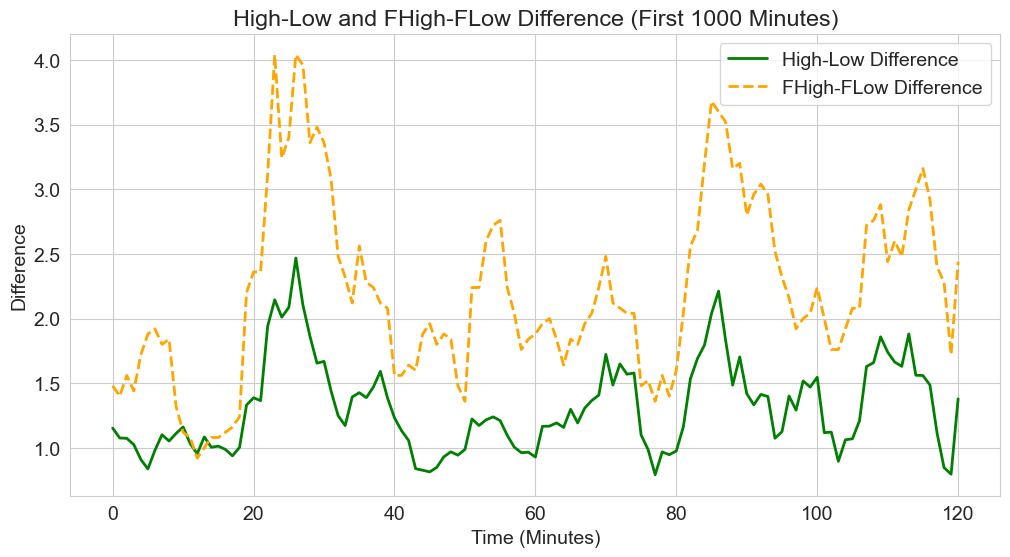

In [10]:
plt.rcParams.update({'font.size': 14})

# 3.1 开盘价和收盘价的差值趋势 (OPEN-CLOSE 和 FOPEN-FCLOSE)
open_close_diff = open_prices - close_prices
fopen_fclose_diff = fopen_prices - fclose_prices

colors = {
    'open_close_diff': '#FFA07A',  # 淡橙色
    'fopen_fclose_diff': '#87CEFA',  # 淡蓝色
    'high_low_diff': '#98FB98',  # 淡绿色
    'fhigh_flow_diff': '#FFD700'  # 金黄色
}

# 采样和平滑参数
sampling_interval = 8  # 每10个点进行一次采样
window_size = 5  # 移动平均窗口大小

def smooth(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# 对Open-Close和High-Low进行采样和平滑处理
sampled_open_close_diff = (open_prices[:1000] - close_prices[:1000])[::sampling_interval]
smoothed_open_close_diff = smooth(sampled_open_close_diff, window_size)

sampled_fopen_fclose_diff = (fopen_prices[:1000] - fclose_prices[:1000])[::sampling_interval]
smoothed_fopen_fclose_diff = smooth(sampled_fopen_fclose_diff, window_size)

sampled_high_low_diff = (high_prices[:1000] - low_prices[:1000])[::sampling_interval]
smoothed_high_low_diff = smooth(sampled_high_low_diff, window_size)

sampled_fhigh_flow_diff = (fhigh_prices[:1000] - flow_prices[:1000])[::sampling_interval]
smoothed_fhigh_flow_diff = smooth(sampled_fhigh_flow_diff, window_size)


plt.figure(figsize=(12, 6))
plt.plot(smoothed_fopen_fclose_diff[:1000], label='Open-Close Difference', color=colors["open_close_diff"], linewidth=2)
plt.plot(smoothed_open_close_diff[:1000], label='FOpen-FClose Difference', color=colors["fopen_fclose_diff"], linestyle='--', linewidth=2)
plt.title('Open-Close and FOpen-FClose Difference (First 1000 Minutes)')
plt.xlabel('Time (Minutes)')
plt.ylabel('Difference')
plt.legend()
plt.grid(True)
plt.show()

# 3.2 最高价和最低价的差值趋势 (HIGH-LOW 和 FHIGH-FLOW)
# high_low_diff = high_prices - low_prices
# fhigh_flow_diff = fhigh_prices - flow_prices

plt.figure(figsize=(12, 6))
plt.plot(smoothed_high_low_diff[:1000], label='High-Low Difference', color='green', linewidth=2)
plt.plot(smoothed_fhigh_flow_diff[:1000], label='FHigh-FLow Difference', color='orange', linestyle='--', linewidth=2)
plt.title('High-Low and FHigh-FLow Difference (First 1000 Minutes)')
plt.xlabel('Time (Minutes)')
plt.ylabel('Difference')
plt.legend()
plt.grid(True)
plt.show()

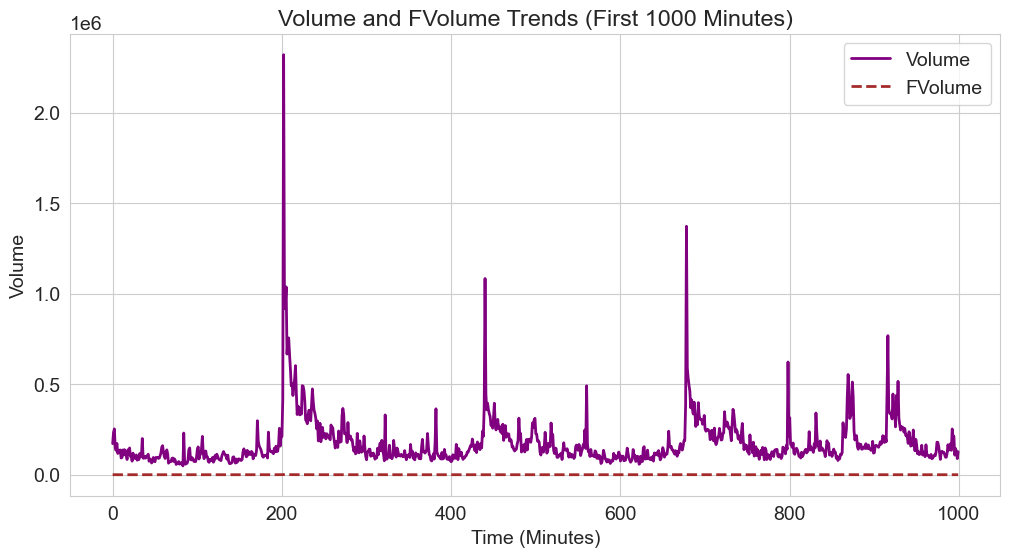

In [11]:
# 3.3 交易量的变化趋势 (VOL 和 FVOL)
plt.figure(figsize=(12, 6))
plt.plot(volume[:1000], label='Volume', color='purple', linewidth=2)
# plt.plot(fvolume[:1000], label='FVolume', color='brown', linestyle='--', linewidth=2)
plt.title('Volume and FVolume Trends (First 1000 Minutes)')
plt.xlabel('Time (Minutes)')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

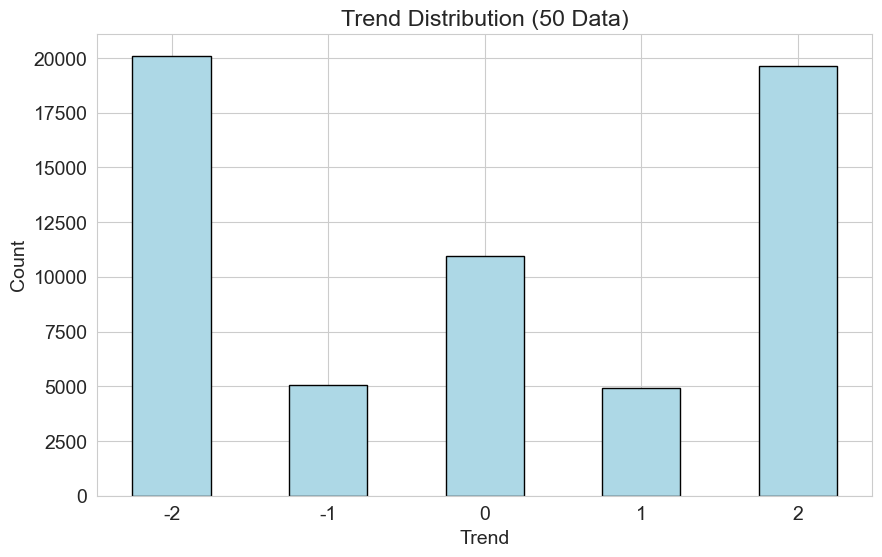

In [18]:
trend_counts_50 = [np.sum(trend == -2), np.sum(trend == -1), np.sum(trend == 0), np.sum(trend == 1), np.sum(trend == 2)]

plt.figure(figsize=(10, 6))
plt.bar([-2, -1, 0, 1, 2], trend_counts_50, tick_label=['-2', '-1', '0', '1', '2'], edgecolor='black', color='lightblue', width=0.5)
plt.title('Trend Distribution (50 Data)')
plt.xlabel('Trend')
plt.ylabel('Count')
plt.grid(True)
plt.show()

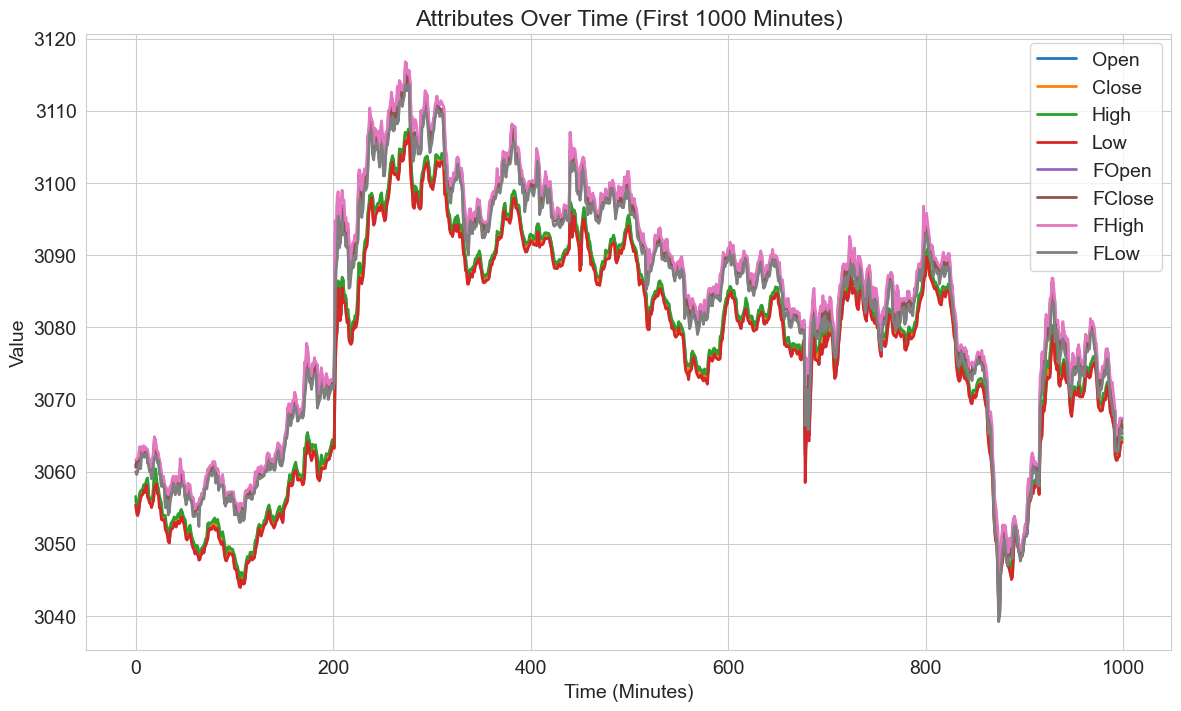

In [16]:
plt.figure(figsize=(14, 8))
attributes = ['Open', 'Close', 'High', 'Low', 'FOpen', 'FClose', 'FHigh', 'FLow']
for i, attr in enumerate([open_prices, close_prices, high_prices, low_prices, fopen_prices, fclose_prices, fhigh_prices, flow_prices]):
    plt.plot(attr[:1000], label=attributes[i], linewidth=2)

plt.title('Attributes Over Time (First 1000 Minutes)')
plt.xlabel('Time (Minutes)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

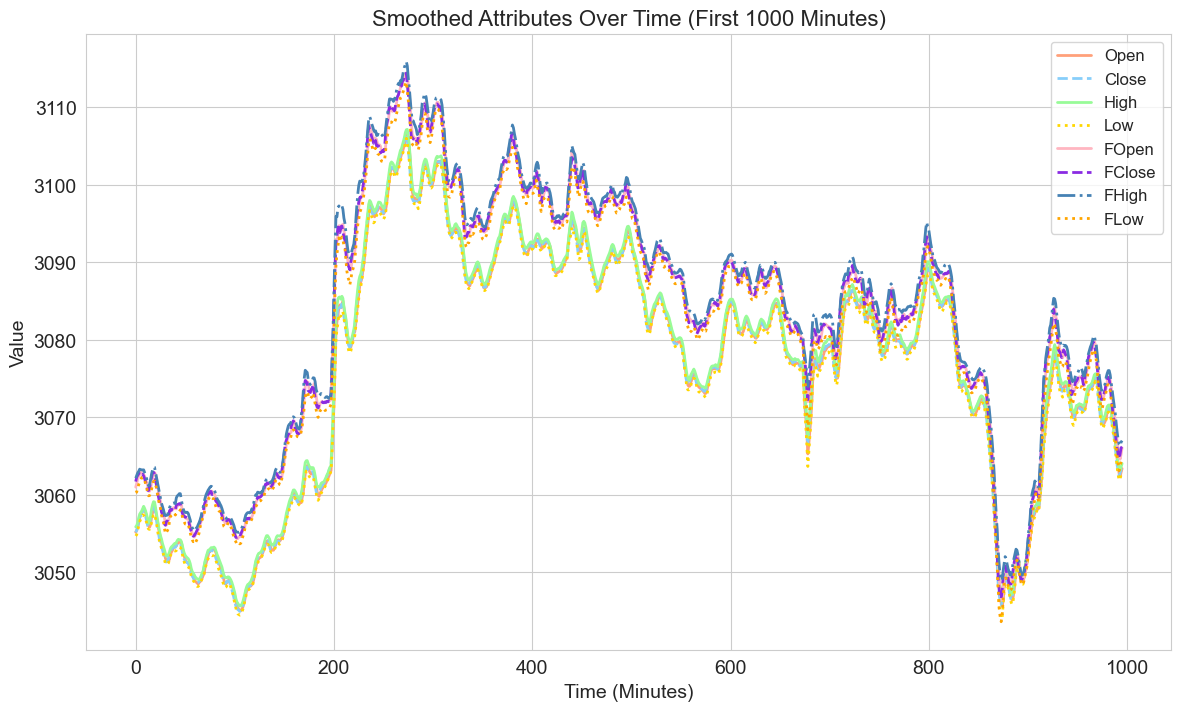

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 加载数据并提取相关属性
data = np.load('50_2020.npy')

# 提取各个维度的数据
open_prices = data[:, 0]
close_prices = data[:, 1]
high_prices = data[:, 2]
low_prices = data[:, 3]
fopen_prices = data[:, 5]
fclose_prices = data[:, 6]
fhigh_prices = data[:, 7]
flow_prices = data[:, 8]

# 平滑函数，使用移动平均
def smooth(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

window_size = 5

smoothed_open = smooth(open_prices[:1000], window_size)
smoothed_close = smooth(close_prices[:1000], window_size)
smoothed_high = smooth(high_prices[:1000], window_size)
smoothed_low = smooth(low_prices[:1000], window_size)
smoothed_fopen = smooth(fopen_prices[:1000], window_size)
smoothed_fclose = smooth(fclose_prices[:1000], window_size)
smoothed_fhigh = smooth(fhigh_prices[:1000], window_size)
smoothed_flow = smooth(flow_prices[:1000], window_size)

# 明亮且柔和的颜色方案
colors = {
    'open': '#FFA07A',  # 淡橙色
    'close': '#87CEFA',  # 淡蓝色
    'high': '#98FB98',  # 淡绿色
    'low': '#FFD700',  # 金黄色
    'fopen': '#FFB6C1',  # 淡粉色
    'fclose': '#8A2BE2',  # 紫罗兰色
    'fhigh': '#4682B4',  # 钢蓝色
    'flow': '#FFA500'  # 橙色
}

# 3.5 平滑后的趋势随时间的变化
plt.figure(figsize=(14, 8))

# 绘制平滑后的曲线
plt.plot(smoothed_open, label='Open', color=colors['open'], linewidth=2)
plt.plot(smoothed_close, label='Close', color=colors['close'], linestyle='--', linewidth=2)
plt.plot(smoothed_high, label='High', color=colors['high'], linewidth=2)
plt.plot(smoothed_low, label='Low', color=colors['low'], linestyle=':', linewidth=2)

plt.plot(smoothed_fopen, label='FOpen', color=colors['fopen'], linewidth=2)
plt.plot(smoothed_fclose, label='FClose', color=colors['fclose'], linestyle='--', linewidth=2)
plt.plot(smoothed_fhigh, label='FHigh', color=colors['fhigh'], linestyle='-.', linewidth=2)
plt.plot(smoothed_flow, label='FLow', color=colors['flow'], linestyle=':', linewidth=2)

# 添加标题和标签
plt.title('Smoothed Attributes Over Time (First 1000 Minutes)', fontsize=16)
plt.xlabel('Time (Minutes)', fontsize=14)
plt.ylabel('Value', fontsize=14)

# 添加图例
plt.legend(fontsize=12)

# 添加网格
plt.grid(True)

# 显示图表
plt.show()

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 加载三个npy文件
data_50 = np.load('50_2020.npy')
data_300 = np.load('300_2020.npy')
data_500 = np.load('500_2020.npy')

# 提取volume (第4列)
volume_50 = data_50[:, 4]
volume_300 = data_300[:, 4]
volume_500 = data_500[:, 4]

# 提取 open_prices, close_prices, high_prices, low_prices 并计算其均值
open_prices_50 = data_50[:, 0]
close_prices_50 = data_50[:, 1]
high_prices_50 = data_50[:, 2]
low_prices_50 = data_50[:, 3]
price_avg_50 = (open_prices_50 + close_prices_50 + high_prices_50 + low_prices_50) / 4

open_prices_300 = data_300[:, 0]
close_prices_300 = data_300[:, 1]
high_prices_300 = data_300[:, 2]
low_prices_300 = data_300[:, 3]
price_avg_300 = (open_prices_300 + close_prices_300 + high_prices_300 + low_prices_300) / 4

open_prices_500 = data_500[:, 0]
close_prices_500 = data_500[:, 1]
high_prices_500 = data_500[:, 2]
low_prices_500 = data_500[:, 3]
price_avg_500 = (open_prices_500 + close_prices_500 + high_prices_500 + low_prices_500) / 4

# 提取 trend（最后一列）
trend_50 = data_50[:, -1]
trend_300 = data_300[:, -1]
trend_500 = data_500[:, -1]

# 设置采样频率
sampling_interval = 10  # 每隔10个点采样
time_limit = 2000  # 限制前2000个数据点

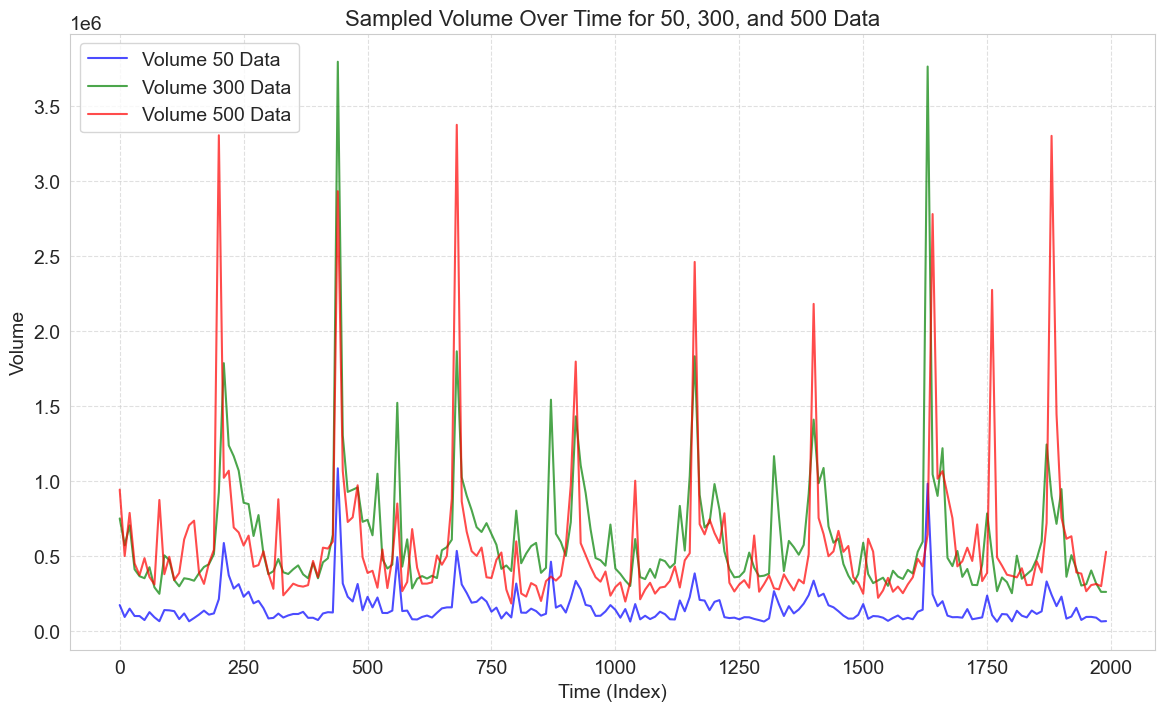

In [24]:
# 对时间和数据进行采样
time_index_50 = np.arange(len(volume_50))[:time_limit:sampling_interval]
volume_50_sampled = volume_50[:time_limit:sampling_interval]
price_avg_50_sampled = price_avg_50[:time_limit:sampling_interval]
trend_50_sampled = trend_50[:time_limit:sampling_interval]

time_index_300 = np.arange(len(volume_300))[:time_limit:sampling_interval]
volume_300_sampled = volume_300[:time_limit:sampling_interval]
price_avg_300_sampled = price_avg_300[:time_limit:sampling_interval]
trend_300_sampled = trend_300[:time_limit:sampling_interval]

time_index_500 = np.arange(len(volume_500))[:time_limit:sampling_interval]
volume_500_sampled = volume_500[:time_limit:sampling_interval]
price_avg_500_sampled = price_avg_500[:time_limit:sampling_interval]
trend_500_sampled = trend_500[:time_limit:sampling_interval]

# 1. 绘制采样后的volume随时间的变化
plt.figure(figsize=(14, 8))
plt.plot(time_index_50, volume_50_sampled, label='Volume 50 Data', color='blue', alpha=0.7)
plt.plot(time_index_300, volume_300_sampled, label='Volume 300 Data', color='green', alpha=0.7)
plt.plot(time_index_500, volume_500_sampled, label='Volume 500 Data', color='red', alpha=0.7)
plt.title('Sampled Volume Over Time for 50, 300, and 500 Data', fontsize=16)
plt.xlabel('Time (Index)', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

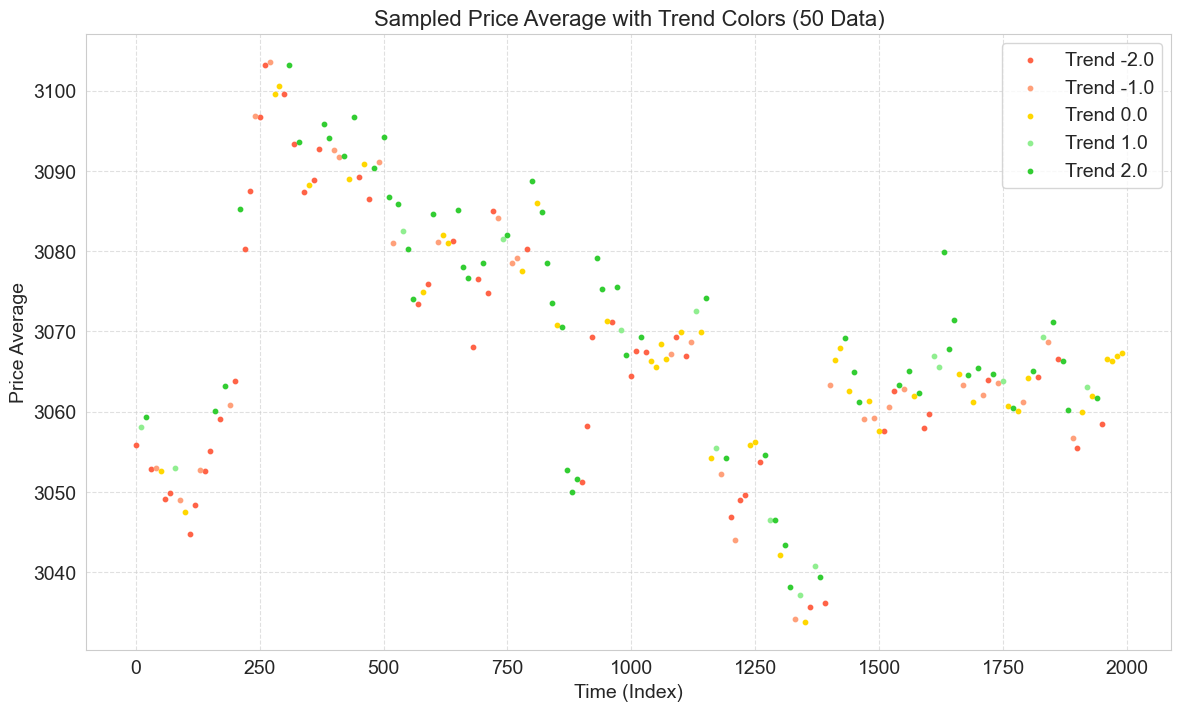

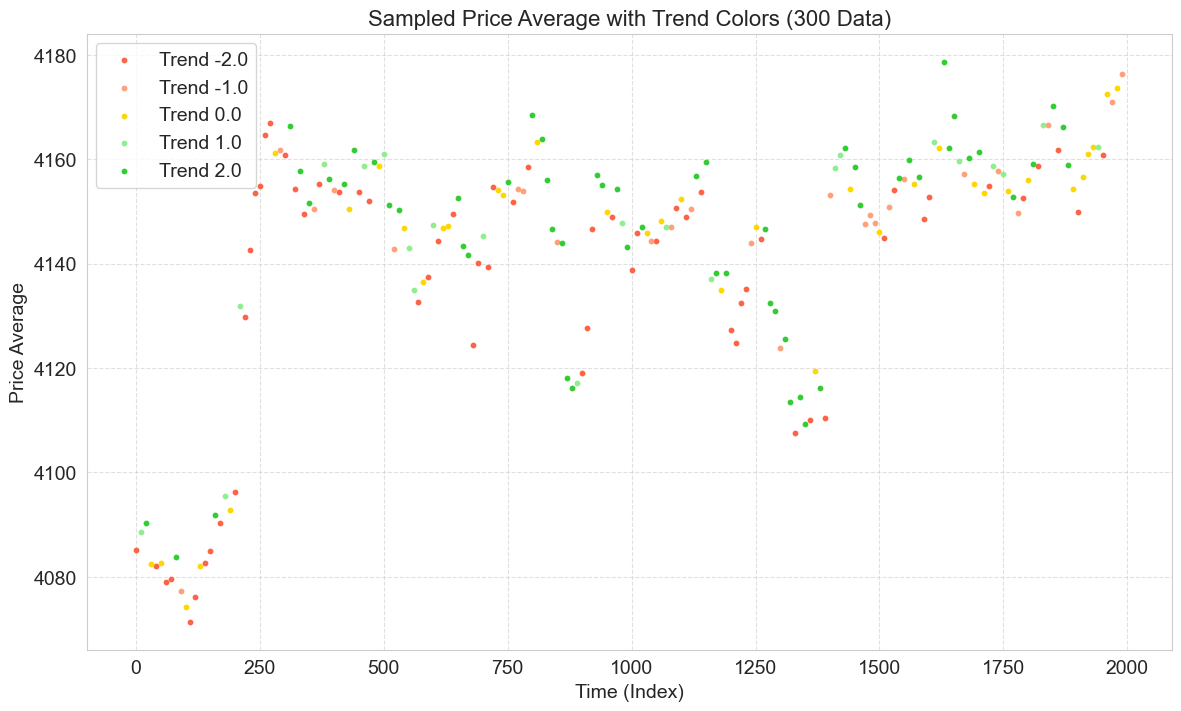

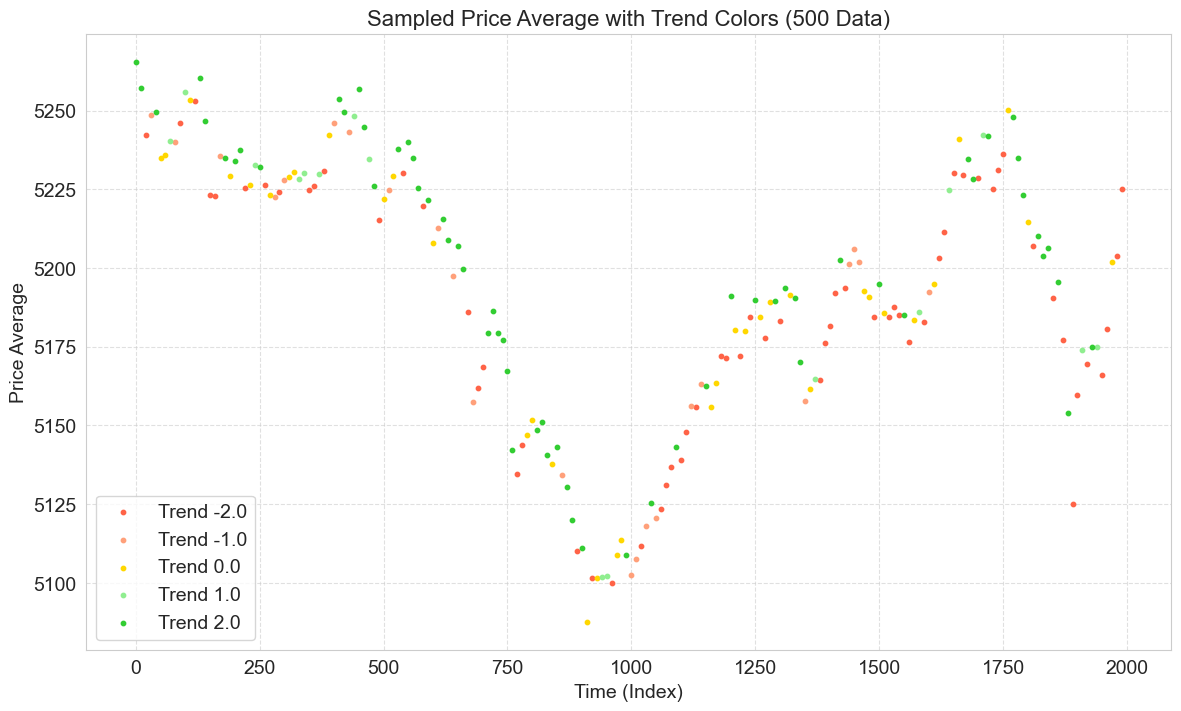

In [27]:
def plot_price_trend_with_colors(time_index, price_avg, trend, label):
    colors = { -2: '#FF6347',  # 红色：大跌
               -1: '#FFA07A',  # 橙色：下跌
                0: '#FFD700',  # 黄色：平稳
                1: '#90EE90',  # 浅绿色：上涨
                2: '#32CD32' } # 绿色：大涨
    plt.figure(figsize=(14, 8))

    for t in np.unique(trend):
        indices = np.where(trend == t)[0]
        plt.scatter(time_index[indices], price_avg[indices], c=colors[t], label=f'Trend {t}', s=10)

    plt.title(f'Sampled Price Average with Trend Colors ({label})', fontsize=16)
    plt.xlabel('Time (Index)', fontsize=14)
    plt.ylabel('Price Average', fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# 分别绘制采样后的50、300、500数据的趋势图
plot_price_trend_with_colors(time_index_50, price_avg_50_sampled, trend_50_sampled, '50 Data')
plot_price_trend_with_colors(time_index_300, price_avg_300_sampled, trend_300_sampled, '300 Data')
plot_price_trend_with_colors(time_index_500, price_avg_500_sampled, trend_500_sampled, '500 Data')

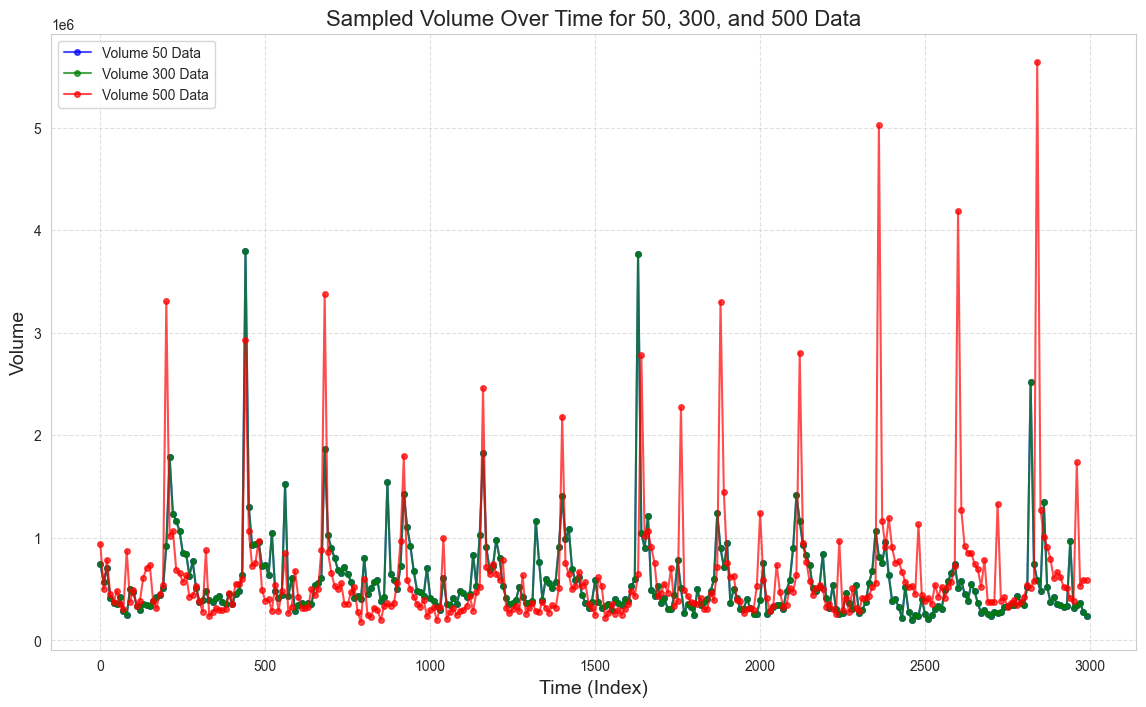

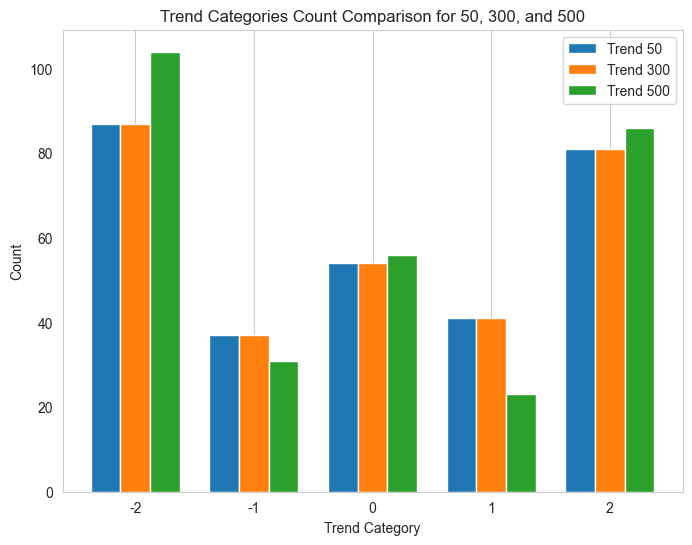

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 加载三个npy文件
data_50 = np.load('../newdata/300_2020.npy')
data_300 = np.load('../newdata/300_2020.npy')
data_500 = np.load('../newdata/500_2020.npy')

# 提取volume (第4列)
volume_50 = data_50[:, 4]
volume_300 = data_300[:, 4]
volume_500 = data_500[:, 4]

# 提取 open_prices, close_prices, high_prices, low_prices 并计算其均值
open_prices_50 = data_50[:, 0]
close_prices_50 = data_50[:, 1]
high_prices_50 = data_50[:, 2]
low_prices_50 = data_50[:, 3]
price_avg_50 = (open_prices_50 + close_prices_50 + high_prices_50 + low_prices_50) / 4

open_prices_300 = data_300[:, 0]
close_prices_300 = data_300[:, 1]
high_prices_300 = data_300[:, 2]
low_prices_300 = data_300[:, 3]
price_avg_300 = (open_prices_300 + close_prices_300 + high_prices_300 + low_prices_300) / 4

open_prices_500 = data_500[:, 0]
close_prices_500 = data_500[:, 1]
high_prices_500 = data_500[:, 2]
low_prices_500 = data_500[:, 3]
price_avg_500 = (open_prices_500 + close_prices_500 + high_prices_500 + low_prices_500) / 4

# 提取 trend（最后一列）
trend_50 = data_50[:, -1]
trend_300 = data_300[:, -1]
trend_500 = data_500[:, -1]

# 设置采样频率
sampling_interval = 10  # 每隔10个点采样
time_limit = 3000  # 限制前2000个数据点

# 对时间和数据进行采样
time_index_50 = np.arange(len(volume_50))[:time_limit:sampling_interval]
volume_50_sampled = volume_50[:time_limit:sampling_interval]
price_avg_50_sampled = price_avg_50[:time_limit:sampling_interval]
trend_50_sampled = trend_50[:time_limit:sampling_interval]

time_index_300 = np.arange(len(volume_300))[:time_limit:sampling_interval]
volume_300_sampled = volume_300[:time_limit:sampling_interval]
price_avg_300_sampled = price_avg_300[:time_limit:sampling_interval]
trend_300_sampled = trend_300[:time_limit:sampling_interval]

time_index_500 = np.arange(len(volume_500))[:time_limit:sampling_interval]
volume_500_sampled = volume_500[:time_limit:sampling_interval]
price_avg_500_sampled = price_avg_500[:time_limit:sampling_interval]
trend_500_sampled = trend_500[:time_limit:sampling_interval]

# 1. 绘制采样后的volume随时间的变化并连接点
plt.figure(figsize=(14, 8))
plt.plot(time_index_50, volume_50_sampled, label='Volume 50 Data', color='blue', alpha=0.7, marker='o', linestyle='-', markersize=4)
plt.plot(time_index_300, volume_300_sampled, label='Volume 300 Data', color='green', alpha=0.7, marker='o', linestyle='-', markersize=4)
plt.plot(time_index_500, volume_500_sampled, label='Volume 500 Data', color='red', alpha=0.7, marker='o', linestyle='-', markersize=4)
plt.title('Sampled Volume Over Time for 50, 300, and 500 Data', fontsize=16)
plt.xlabel('Time (Index)', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

categories = [-2, -1, 0, 1, 2]

# 统计trend_50_sampled
unique_50, counts_50 = np.unique(trend_50_sampled, return_counts=True)
trend_counts_50 = dict(zip(unique_50, counts_50))
counts_50 = [trend_counts_50.get(cat, 0) for cat in categories]

# 统计trend_300_sampled
unique_300, counts_300 = np.unique(trend_300_sampled, return_counts=True)
trend_counts_300 = dict(zip(unique_300, counts_300))
counts_300 = [trend_counts_300.get(cat, 0) for cat in categories]

# 统计trend_500_sampled
unique_500, counts_500 = np.unique(trend_500_sampled, return_counts=True)
trend_counts_500 = dict(zip(unique_500, counts_500))
counts_500 = [trend_counts_500.get(cat, 0) for cat in categories]

low_saturation_colors = ['#F4A582', '#92C5DE', '#FDDBC7']  # 低饱和度的颜色
bar_width = 0.25
x = np.arange(len(categories))

plt.figure(figsize=(8, 6))

plt.bar(x - bar_width, counts_50, width=bar_width, label='Trend 50',)
plt.bar(x, counts_300, width=bar_width, label='Trend 300',  )
plt.bar(x + bar_width, counts_500, width=bar_width, label='Trend 500',)

plt.title('Trend Categories Count Comparison for 50, 300, and 500')
plt.xlabel('Trend Category')
plt.ylabel('Count')
plt.xticks(x, categories)
plt.legend()
plt.grid(axis='y')

# 显示图形
plt.show()



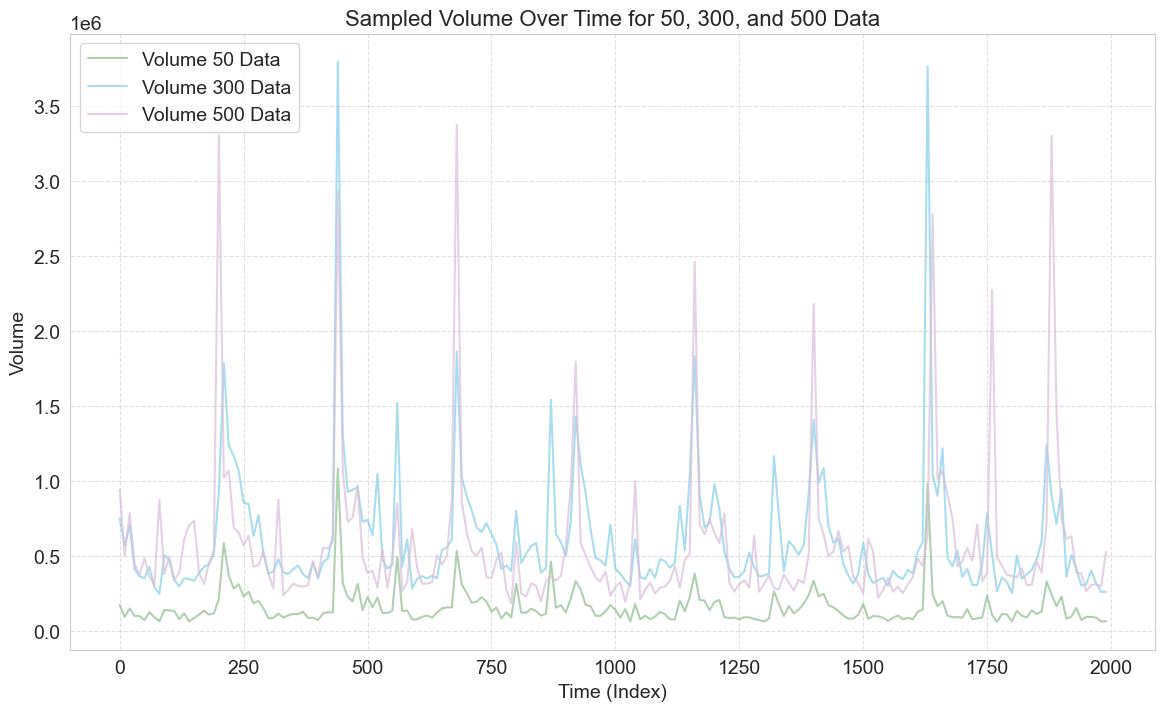

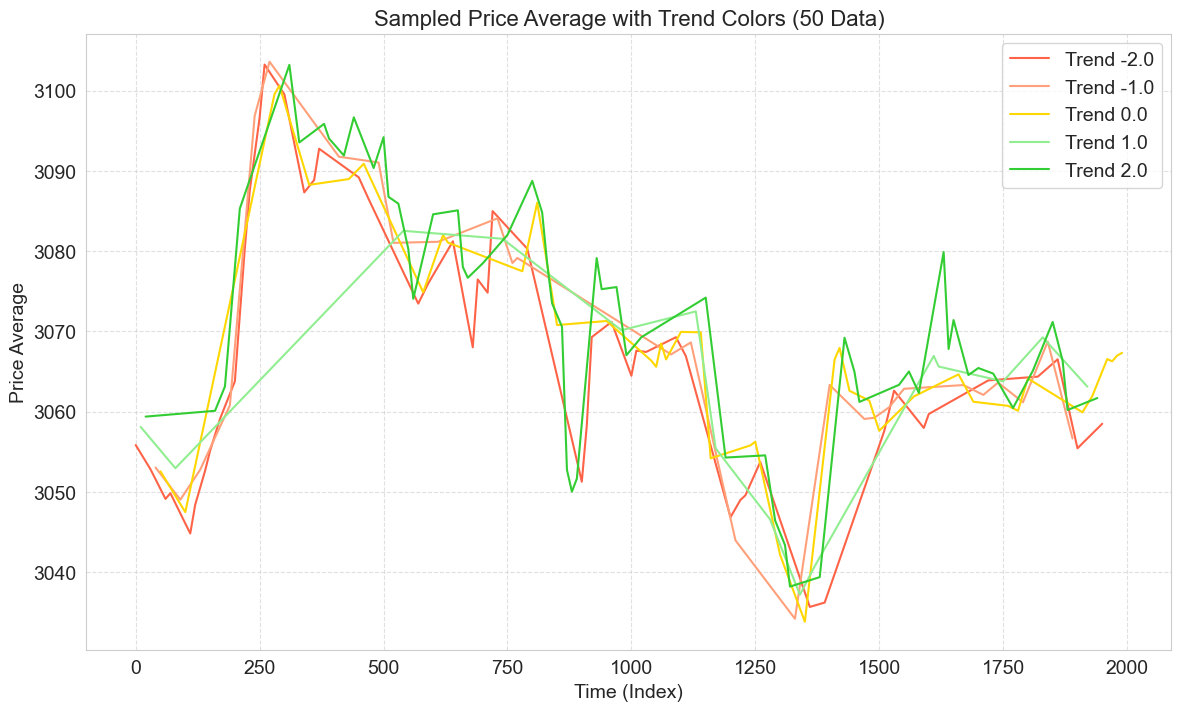

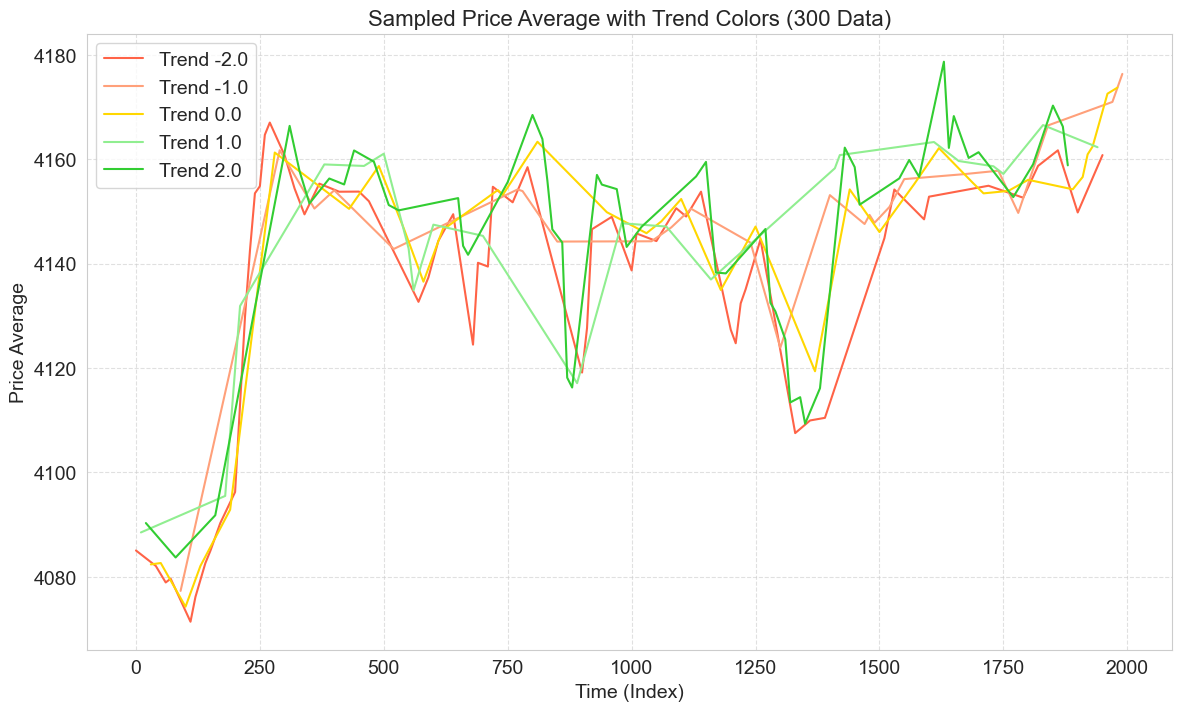

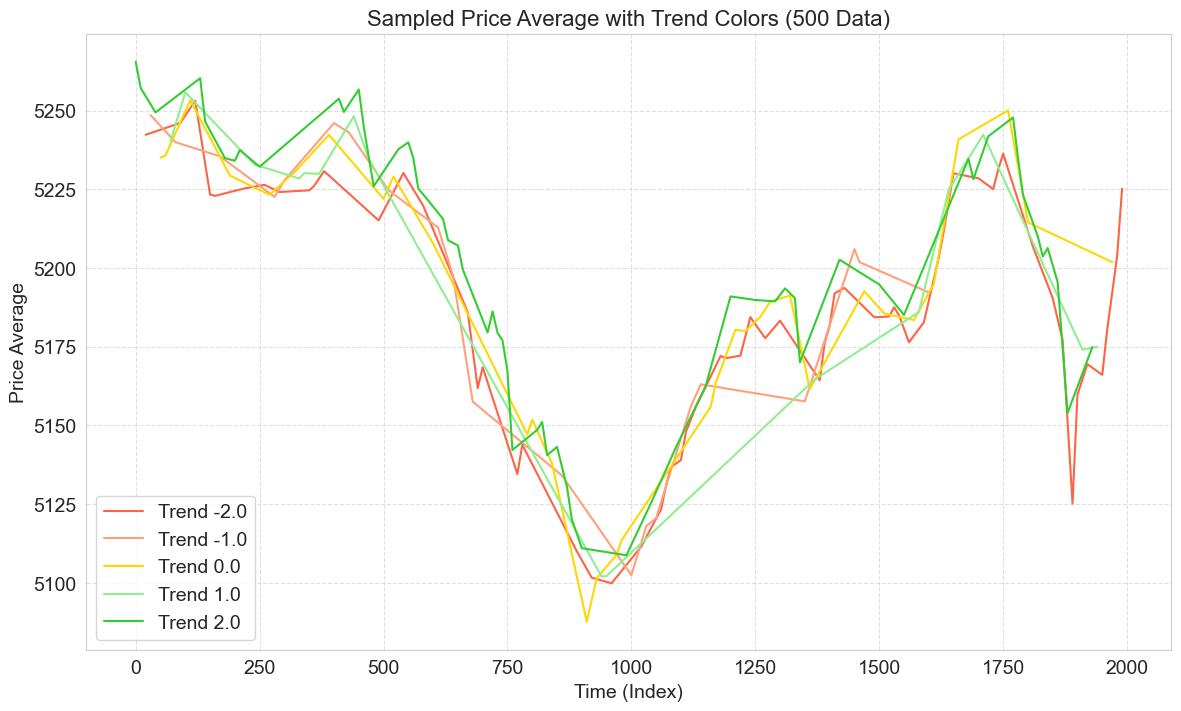

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# 加载三个npy文件
data_50 = np.load('50_2020.npy')
data_300 = np.load('300_2020.npy')
data_500 = np.load('500_2020.npy')

# 提取volume (第4列)
volume_50 = data_50[:, 4]
volume_300 = data_300[:, 4]
volume_500 = data_500[:, 4]

# 提取 open_prices, close_prices, high_prices, low_prices 并计算其均值
open_prices_50 = data_50[:, 0]
close_prices_50 = data_50[:, 1]
high_prices_50 = data_50[:, 2]
low_prices_50 = data_50[:, 3]
price_avg_50 = (open_prices_50 + close_prices_50 + high_prices_50 + low_prices_50) / 4

open_prices_300 = data_300[:, 0]
close_prices_300 = data_300[:, 1]
high_prices_300 = data_300[:, 2]
low_prices_300 = data_300[:, 3]
price_avg_300 = (open_prices_300 + close_prices_300 + high_prices_300 + low_prices_300) / 4

open_prices_500 = data_500[:, 0]
close_prices_500 = data_500[:, 1]
high_prices_500 = data_500[:, 2]
low_prices_500 = data_500[:, 3]
price_avg_500 = (open_prices_500 + close_prices_500 + high_prices_500 + low_prices_500) / 4

# 提取 trend（最后一列）
trend_50 = data_50[:, -1]
trend_300 = data_300[:, -1]
trend_500 = data_500[:, -1]

# 设置采样频率
sampling_interval = 10  # 每隔10个点采样
time_limit = 2000  # 限制前2000个数据点

# 对时间和数据进行采样
time_index_50 = np.arange(len(volume_50))[:time_limit:sampling_interval]
volume_50_sampled = volume_50[:time_limit:sampling_interval]
price_avg_50_sampled = price_avg_50[:time_limit:sampling_interval]
trend_50_sampled = trend_50[:time_limit:sampling_interval]

time_index_300 = np.arange(len(volume_300))[:time_limit:sampling_interval]
volume_300_sampled = volume_300[:time_limit:sampling_interval]
price_avg_300_sampled = price_avg_300[:time_limit:sampling_interval]
trend_300_sampled = trend_300[:time_limit:sampling_interval]

time_index_500 = np.arange(len(volume_500))[:time_limit:sampling_interval]
volume_500_sampled = volume_500[:time_limit:sampling_interval]
price_avg_500_sampled = price_avg_500[:time_limit:sampling_interval]
trend_500_sampled = trend_500[:time_limit:sampling_interval]

# 1. 绘制采样后的volume随时间的变化，使用低饱和度颜色并连接点
plt.figure(figsize=(14, 8))
plt.plot(time_index_50, volume_50_sampled, label='Volume 50 Data', color='#8FBC8F', alpha=0.7, linestyle='-', markersize=4)
plt.plot(time_index_300, volume_300_sampled, label='Volume 300 Data', color='#87CEEB', alpha=0.7, linestyle='-', markersize=4)
plt.plot(time_index_500, volume_500_sampled, label='Volume 500 Data', color='#D8BFD8', alpha=0.7, linestyle='-', markersize=4)
plt.title('Sampled Volume Over Time for 50, 300, and 500 Data', fontsize=16)
plt.xlabel('Time (Index)', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 2. 根据trend标签对采样后的(open_prices + close_prices + high_prices + low_prices) / 4的值上色并连接点
def plot_price_trend_with_colors(time_index, price_avg, trend, label):
    colors = { -2: '#FF6347',  # 红色：大跌
               -1: '#FFA07A',  # 橙色：下跌
                0: '#FFD700',  # 黄色：平稳
                1: '#90EE90',  # 浅绿色：上涨
                2: '#32CD32' } # 绿色：大涨
    plt.figure(figsize=(14, 8))

    for t in np.unique(trend):
        indices = np.where(trend == t)[0]
        plt.plot(time_index[indices], price_avg[indices], color=colors[t], label=f'Trend {t}', linestyle='-', markersize=4)

    plt.title(f'Sampled Price Average with Trend Colors ({label})', fontsize=16)
    plt.xlabel('Time (Index)', fontsize=14)
    plt.ylabel('Price Average', fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# 分别绘制采样后的50、300、500数据的趋势图，并沿着时间连接点
plot_price_trend_with_colors(time_index_50, price_avg_50_sampled, trend_50_sampled, '50 Data')
plot_price_trend_with_colors(time_index_300, price_avg_300_sampled, trend_300_sampled, '300 Data')
plot_price_trend_with_colors(time_index_500, price_avg_500_sampled, trend_500_sampled, '500 Data')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


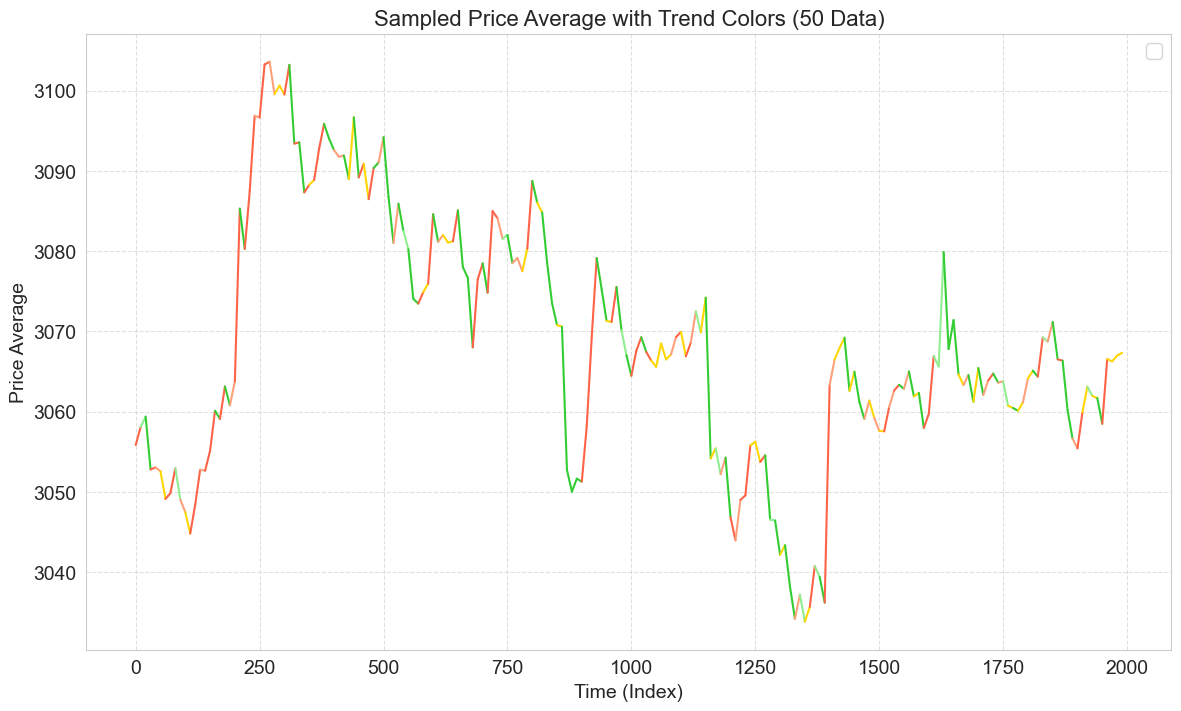

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


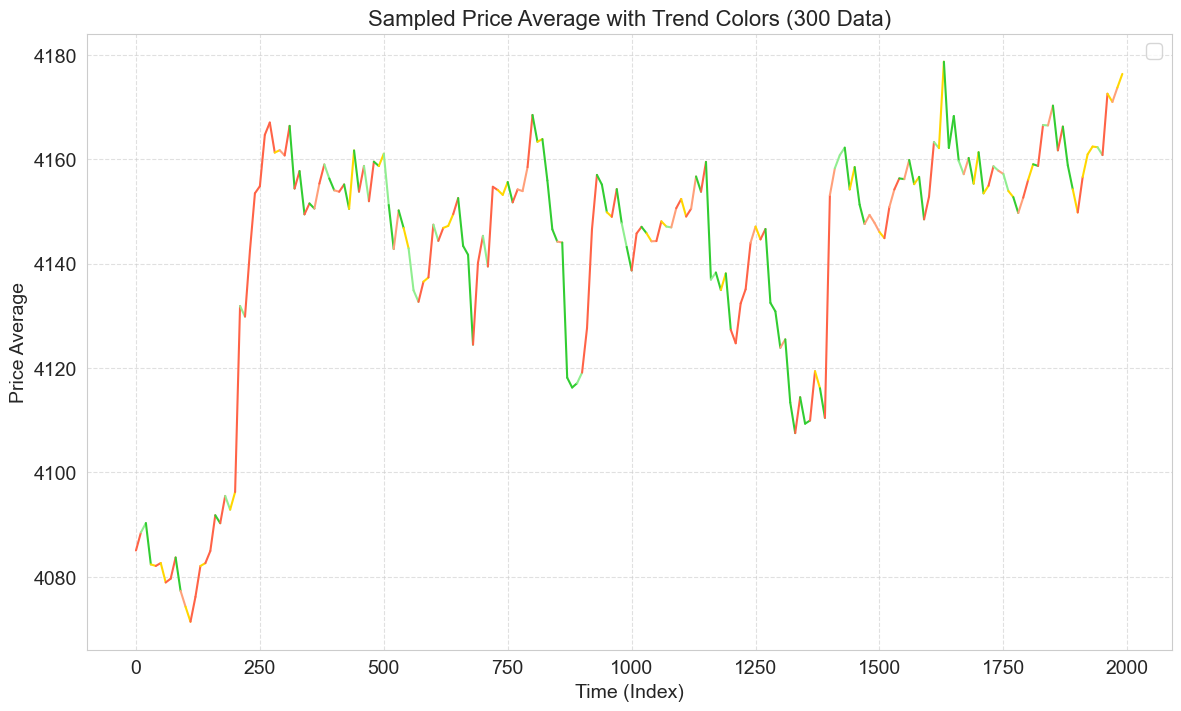

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


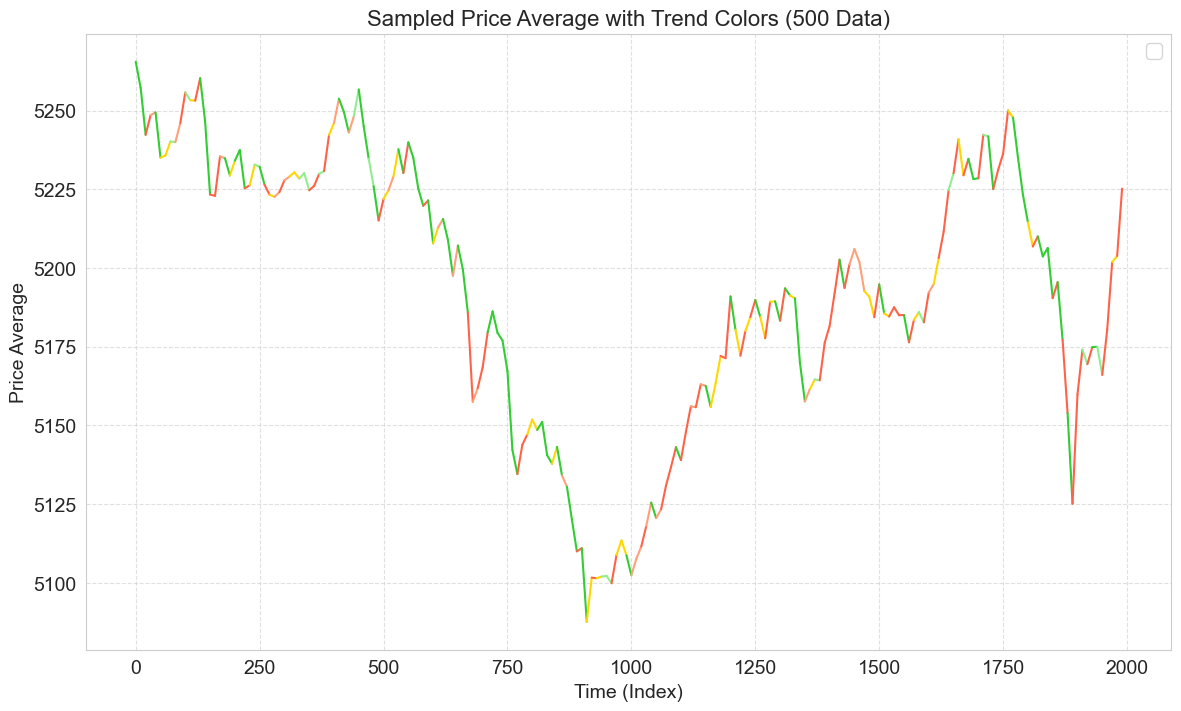

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 加载三个npy文件
data_50 = np.load('50_2020.npy')
data_300 = np.load('300_2020.npy')
data_500 = np.load('500_2020.npy')

# 提取 open_prices, close_prices, high_prices, low_prices 并计算其均值
open_prices_50 = data_50[:, 0]
close_prices_50 = data_50[:, 1]
high_prices_50 = data_50[:, 2]
low_prices_50 = data_50[:, 3]
price_avg_50 = (open_prices_50 + close_prices_50 + high_prices_50 + low_prices_50) / 4

open_prices_300 = data_300[:, 0]
close_prices_300 = data_300[:, 1]
high_prices_300 = data_300[:, 2]
low_prices_300 = data_300[:, 3]
price_avg_300 = (open_prices_300 + close_prices_300 + high_prices_300 + low_prices_300) / 4

open_prices_500 = data_500[:, 0]
close_prices_500 = data_500[:, 1]
high_prices_500 = data_500[:, 2]
low_prices_500 = data_500[:, 3]
price_avg_500 = (open_prices_500 + close_prices_500 + high_prices_500 + low_prices_500) / 4

# 提取 trend（最后一列）
trend_50 = data_50[:, -1]
trend_300 = data_300[:, -1]
trend_500 = data_500[:, -1]

# 设置采样频率
sampling_interval = 10  # 每隔10个点采样
time_limit = 2000  # 限制前2000个数据点

# 对时间和数据进行采样
time_index_50 = np.arange(len(price_avg_50))[:time_limit:sampling_interval]
price_avg_50_sampled = price_avg_50[:time_limit:sampling_interval]
trend_50_sampled = trend_50[:time_limit:sampling_interval]

time_index_300 = np.arange(len(price_avg_300))[:time_limit:sampling_interval]
price_avg_300_sampled = price_avg_300[:time_limit:sampling_interval]
trend_300_sampled = trend_300[:time_limit:sampling_interval]

time_index_500 = np.arange(len(price_avg_500))[:time_limit:sampling_interval]
price_avg_500_sampled = price_avg_500[:time_limit:sampling_interval]
trend_500_sampled = trend_500[:time_limit:sampling_interval]

# 2. 根据trend标签对采样后的(open_prices + close_prices + high_prices + low_prices) / 4的值上色，并将所有点沿着时间轴连接
def plot_price_trend_with_colors(time_index, price_avg, trend, label):
    colors = { -2: '#FF6347',  # 红色：大跌
               -1: '#FFA07A',  # 橙色：下跌
                0: '#FFD700',  # 黄色：平稳
                1: '#90EE90',  # 浅绿色：上涨
                2: '#32CD32' } # 绿色：大涨
    plt.figure(figsize=(14, 8))

    # 画出趋势点，并沿时间轴连接所有点
    for i in range(len(time_index) - 1):
        plt.plot(time_index[i:i+2], price_avg[i:i+2], color=colors[trend[i]], linestyle='-', markersize=4)

    plt.title(f'Sampled Price Average with Trend Colors ({label})', fontsize=16)
    plt.xlabel('Time (Index)', fontsize=14)
    plt.ylabel('Price Average', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

# 分别绘制采样后的50、300、500数据的趋势图，沿时间轴连接所有点
plot_price_trend_with_colors(time_index_50, price_avg_50_sampled, trend_50_sampled, '50 Data')
plot_price_trend_with_colors(time_index_300, price_avg_300_sampled, trend_300_sampled, '300 Data')
plot_price_trend_with_colors(time_index_500, price_avg_500_sampled, trend_500_sampled, '500 Data')


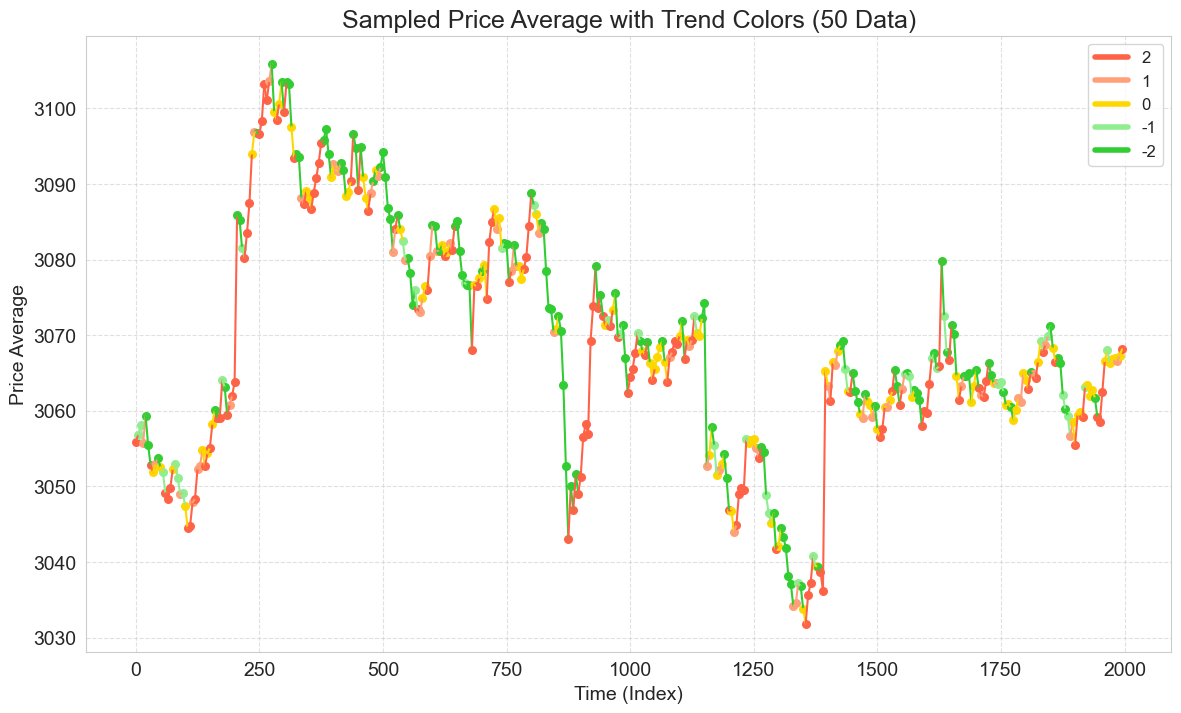

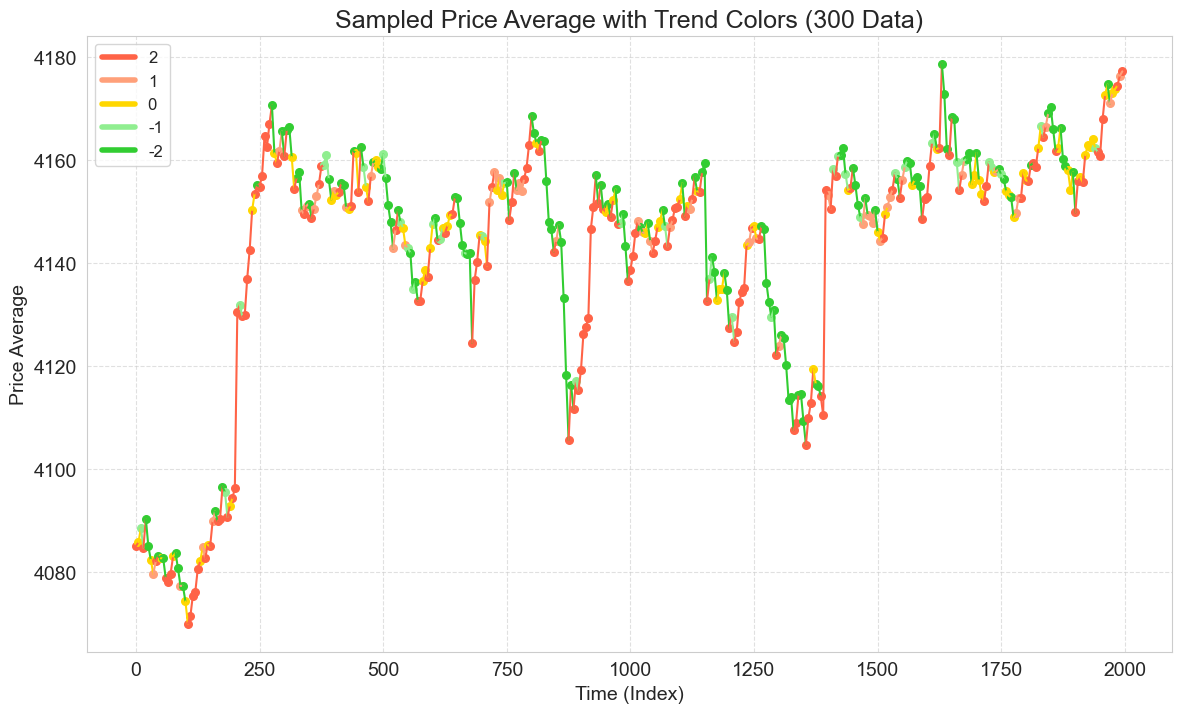

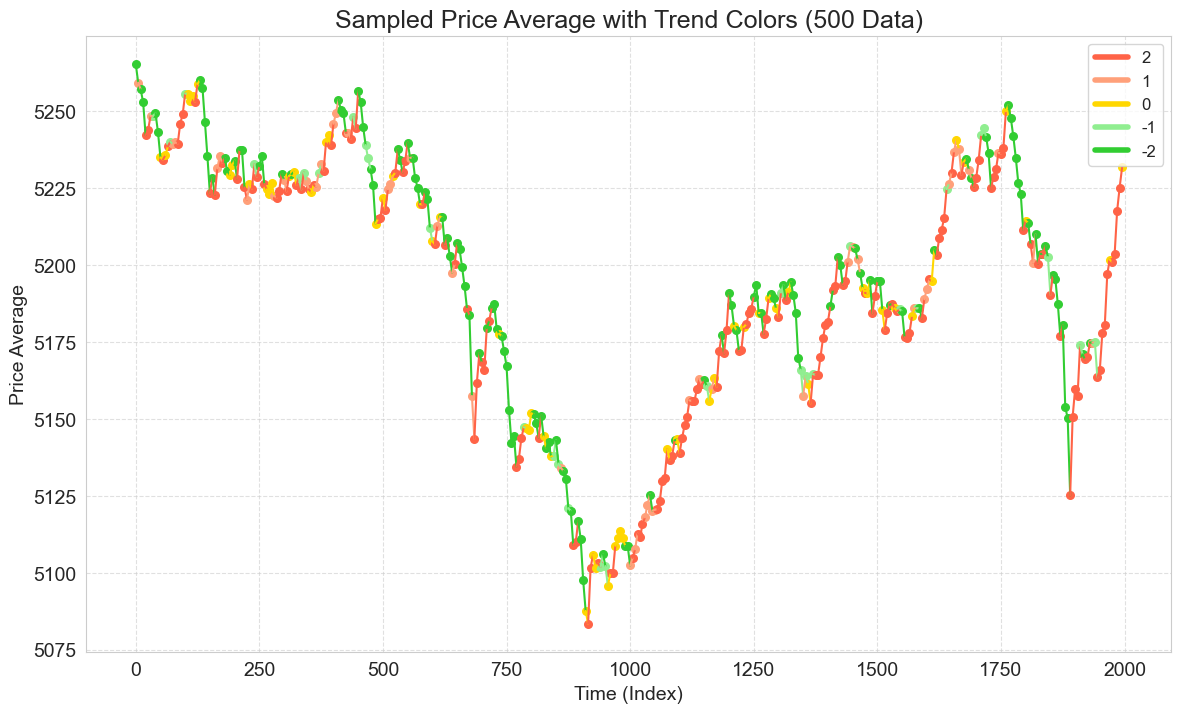

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# 加载三个npy文件
data_50 = np.load('50_2020.npy')
data_300 = np.load('300_2020.npy')
data_500 = np.load('500_2020.npy')

# 提取 open_prices, close_prices, high_prices, low_prices 并计算其均值
open_prices_50 = data_50[:, 0]
close_prices_50 = data_50[:, 1]
high_prices_50 = data_50[:, 2]
low_prices_50 = data_50[:, 3]
price_avg_50 = (open_prices_50 + close_prices_50 + high_prices_50 + low_prices_50) / 4

open_prices_300 = data_300[:, 0]
close_prices_300 = data_300[:, 1]
high_prices_300 = data_300[:, 2]
low_prices_300 = data_300[:, 3]
price_avg_300 = (open_prices_300 + close_prices_300 + high_prices_300 + low_prices_300) / 4

open_prices_500 = data_500[:, 0]
close_prices_500 = data_500[:, 1]
high_prices_500 = data_500[:, 2]
low_prices_500 = data_500[:, 3]
price_avg_500 = (open_prices_500 + close_prices_500 + high_prices_500 + low_prices_500) / 4

# 提取 trend（最后一列）
trend_50 = data_50[:, -1]
trend_300 = data_300[:, -1]
trend_500 = data_500[:, -1]

# 设置采样频率
sampling_interval = 5  # 每隔10个点采样
time_limit = 2000  # 限制前2000个数据点

# 对时间和数据进行采样
time_index_50 = np.arange(len(price_avg_50))[:time_limit:sampling_interval]
price_avg_50_sampled = price_avg_50[:time_limit:sampling_interval]
trend_50_sampled = trend_50[:time_limit:sampling_interval]

time_index_300 = np.arange(len(price_avg_300))[:time_limit:sampling_interval]
price_avg_300_sampled = price_avg_300[:time_limit:sampling_interval]
trend_300_sampled = trend_300[:time_limit:sampling_interval]

time_index_500 = np.arange(len(price_avg_500))[:time_limit:sampling_interval]
price_avg_500_sampled = price_avg_500[:time_limit:sampling_interval]
trend_500_sampled = trend_500[:time_limit:sampling_interval]

colors = { -2: '#FF6347',  # 红色：大涨
               2: '#32CD32',  # 绿色：大跌
               0: '#FFD700',  # 黄色：平稳
               1: '#90EE90',  # 浅绿色：下跌
               -1: '#FFA07A' } # 浅橙色：上涨

# 2. 根据trend标签对采样后的(open_prices + close_prices + high_prices + low_prices) / 4的值上色，并将所有点沿着时间轴连接，添加点标记
def plot_price_trend_with_colors(time_index, price_avg, trend, label):
    # 颜色映射


    plt.figure(figsize=(14, 8))

    # 画出趋势点，并沿时间轴连接所有点
    for i in range(len(time_index) - 1):
        plt.plot(time_index[i:i+2], price_avg[i:i+2], color=colors[trend[i]], linestyle='-', markersize=4)

    # 添加点标记
    for i in range(len(time_index)):
        plt.scatter(time_index[i], price_avg[i], color=colors[trend[i]], s=30)  # 标出每个采样点

    # 添加图例
    legend_elements = [plt.Line2D([0], [0], color='#FF6347', lw=4, label='2'),
                       plt.Line2D([0], [0], color='#FFA07A', lw=4, label='1'),
                       plt.Line2D([0], [0], color='#FFD700', lw=4, label='0 '),
                       plt.Line2D([0], [0], color='#90EE90', lw=4, label='-1'),
                       plt.Line2D([0], [0], color='#32CD32', lw=4, label='-2')]
    plt.legend(handles=legend_elements, fontsize=12)

    # 调整字体大小和美化
    plt.title(f'Sampled Price Average with Trend Colors ({label})', fontsize=18)
    plt.xlabel('Time (Index)', fontsize=14)
    plt.ylabel('Price Average', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# 分别绘制采样后的50、300、500数据的趋势图，沿时间轴连接所有点并美化
plot_price_trend_with_colors(time_index_50, price_avg_50_sampled, trend_50_sampled, '50 Data')
plot_price_trend_with_colors(time_index_300, price_avg_300_sampled, trend_300_sampled, '300 Data')
plot_price_trend_with_colors(time_index_500, price_avg_500_sampled, trend_500_sampled, '500 Data')


In [41]:
import numpy as np
import matplotlib.pyplot as plt

# 加载三个npy文件
data_50 = np.load('50_2020.npy')
data_300 = np.load('300_2020.npy')
data_500 = np.load('500_2020.npy')

# 提取 open_prices, close_prices, high_prices, low_prices 并计算其均值
open_prices_50 = data_50[:, 0]
close_prices_50 = data_50[:, 1]
high_prices_50 = data_50[:, 2]
low_prices_50 = data_50[:, 3]
price_avg_50 = (open_prices_50 + close_prices_50 + high_prices_50 + low_prices_50) / 4

open_prices_300 = data_300[:, 0]
close_prices_300 = data_300[:, 1]
high_prices_300 = data_300[:, 2]
low_prices_300 = data_300[:, 3]
price_avg_300 = (open_prices_300 + close_prices_300 + high_prices_300 + low_prices_300) / 4

open_prices_500 = data_500[:, 0]
close_prices_500 = data_500[:, 1]
high_prices_500 = data_500[:, 2]
low_prices_500 = data_500[:, 3]
price_avg_500 = (open_prices_500 + close_prices_500 + high_prices_500 + low_prices_500) / 4

# 提取 trend（最后一列）
trend_50 = data_50[:, -1]
trend_300 = data_300[:, -1]
trend_500 = data_500[:, -1]

# 设置采样频率
sampling_interval = 5  # 每隔10个点采样
time_limit = 3000  # 限制前2000个数据点

# 对时间和数据进行采样
time_index_50 = np.arange(len(price_avg_50))[:time_limit:sampling_interval]
price_avg_50_sampled = price_avg_50[:time_limit:sampling_interval]
trend_50_sampled = trend_50[:time_limit:sampling_interval]

time_index_300 = np.arange(len(price_avg_300))[:time_limit:sampling_interval]
price_avg_300_sampled = price_avg_300[:time_limit:sampling_interval]
trend_300_sampled = trend_300[:time_limit:sampling_interval]

time_index_500 = np.arange(len(price_avg_500))[:time_limit:sampling_interval]
price_avg_500_sampled = price_avg_500[:time_limit:sampling_interval]
trend_500_sampled = trend_500[:time_limit:sampling_interval]

colors = { -2: '#FF6347',  # 红色：大涨
               2: '#32CD32',  # 绿色：大跌
               0: '#FFD700',  # 黄色：平稳
               1: '#90EE90',  # 浅绿色：下跌
               -1: '#FFA07A' } # 浅橙色：上涨

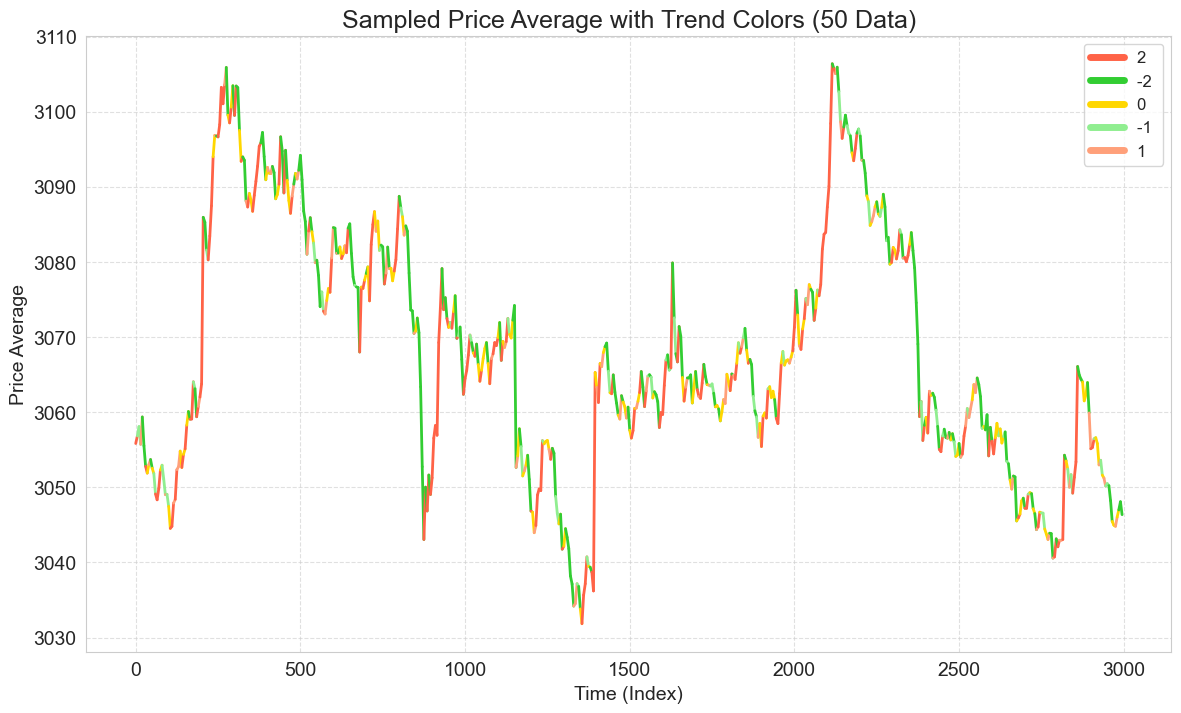

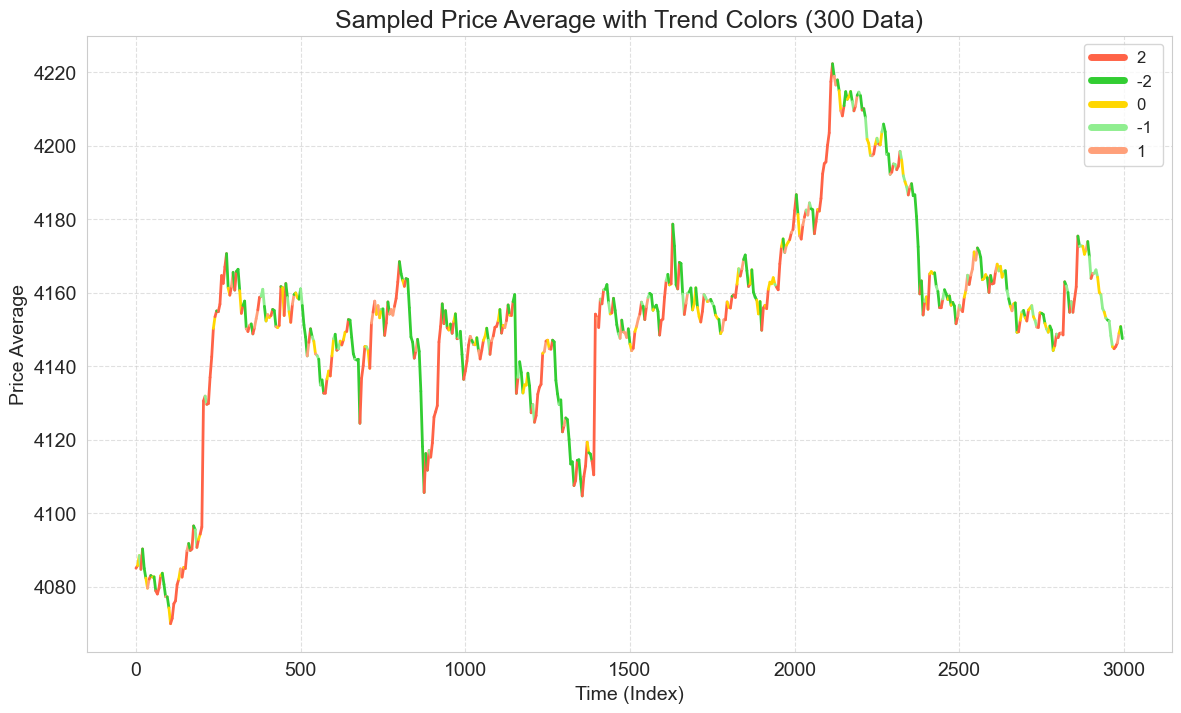

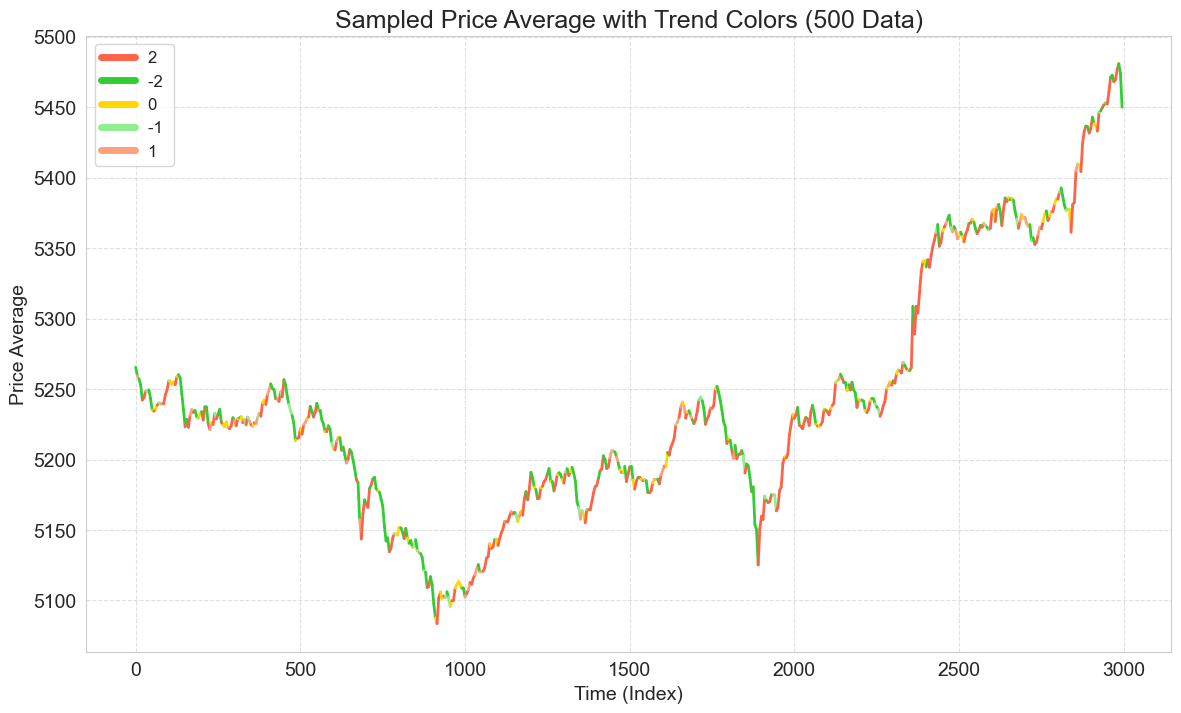

In [43]:
def plot_price_trend_with_colors(time_index, price_avg, trend, label):
    # 颜色映射

    plt.figure(figsize=(14, 8))

    # 画出趋势点，并沿时间轴连接所有点
    for i in range(len(time_index) - 1):
        plt.plot(time_index[i:i+2], price_avg[i:i+2], color=colors[trend[i]], linestyle='-', linewidth=2)

    # 添加图例
    legend_elements = [plt.Line2D([0], [0], color='#FF6347', lw=5, label='2 '),
                       plt.Line2D([0], [0], color='#32CD32', lw=5, label='-2 '),
                       plt.Line2D([0], [0], color='#FFD700', lw=5, label='0 '),
                       plt.Line2D([0], [0], color='#90EE90', lw=5, label='-1 '),
                       plt.Line2D([0], [0], color='#FFA07A', lw=5, label='1 ')]
    plt.legend(handles=legend_elements, fontsize=12)

    # 调整字体大小和美化
    plt.title(f'Sampled Price Average with Trend Colors ({label})', fontsize=18)
    plt.xlabel('Time (Index)', fontsize=14)
    plt.ylabel('Price Average', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# 分别绘制采样后的50、300、500数据的趋势图，沿时间轴连接所有点并美化
plot_price_trend_with_colors(time_index_50, price_avg_50_sampled, trend_50_sampled, '50 Data')
plot_price_trend_with_colors(time_index_300, price_avg_300_sampled, trend_300_sampled, '300 Data')
plot_price_trend_with_colors(time_index_500, price_avg_500_sampled, trend_500_sampled, '500 Data')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 加载数据并提取相关属性
data = np.load('50_2020.npy')

# 提取各个维度的数据
open_prices = data[:, 0]
close_prices = data[:, 1]
high_prices = data[:, 2]
low_prices = data[:, 3]
volume = data[:, 4]
fopen_prices = data[:, 5]
fclose_prices = data[:, 6]
fhigh_prices = data[:, 7]
flow_prices = data[:, 8]
fvolume = data[:, 9]
trend = data[:, 10]  # 趋势标签

# 更新字体大小
plt.rcParams.update({'font.size': 14})

# 定义颜色和线条风格
colors = {
    'open_close_diff': '#FFA07A',  # 淡橙色
    'fopen_fclose_diff': '#87CEFA',  # 淡蓝色
    'high_low_diff': '#98FB98',  # 淡绿色
    'fhigh_flow_diff': '#FFD700'  # 金黄色
}

# 采样和平滑参数
sampling_interval = 8  # 每8个点进行一次采样
window_size = 5  # 移动平均窗口大小

# 平滑函数
def smooth(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# 对Open-Close和High-Low进行采样和平滑处理
sampled_open_close_diff = (open_prices[:1000] - close_prices[:1000])[::sampling_interval]
smoothed_open_close_diff = smooth(sampled_open_close_diff, window_size)

sampled_fopen_fclose_diff = (fopen_prices[:1000] - fclose_prices[:1000])[::sampling_interval]
smoothed_fopen_fclose_diff = smooth(sampled_fopen_fclose_diff, window_size)

sampled_high_low_diff = (high_prices[:1000] - low_prices[:1000])[::sampling_interval]
smoothed_high_low_diff = smooth(sampled_high_low_diff, window_size)

sampled_fhigh_flow_diff = (fhigh_prices[:1000] - flow_prices[:1000])[::sampling_interval]
smoothed_fhigh_flow_diff = smooth(sampled_fhigh_flow_diff, window_size)

# 创建并排展示的图
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 绘制Open-Close和FOpen-FClose差值折线图
axes[0].plot(smoothed_fopen_fclose_diff[:1000], label='FOpen-FClose Difference', color=colors["fopen_fclose_diff"], linestyle='--', linewidth=2)
axes[0].plot(smoothed_open_close_diff[:1000], label='Open-Close Difference', color=colors["open_close_diff"], linewidth=2)
axes[0].set_title('Open-Close and FOpen-FClose Difference')
axes[0].set_xlabel('Time (Minutes)')
axes[0].set_ylabel('Difference')
axes[0].legend()
axes[0].grid(True)

# 绘制High-Low和FHigh-FLow差值折线图
axes[1].plot(smoothed_high_low_diff[:1000], label='High-Low Difference', color='green', linewidth=2)
axes[1].plot(smoothed_fhigh_flow_diff[:1000], label='FHigh-FLow Difference', color='orange', linestyle='--', linewidth=2)
axes[1].set_title('High-Low and FHigh-FLow Difference')
axes[1].set_xlabel('Time (Minutes)')
axes[1].set_ylabel('Difference')
axes[1].legend()
axes[1].grid(True)

# 调整布局
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '50_2020.npy'